<a href="https://colab.research.google.com/github/Koonavoot/Project-Amazon-Kindle-Data/blob/main/Amazon_Kindle_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CPE300/203
 Dataset: [Download](https://drive.google.com/file/d/1Zv6ABdtBMVxD2nGuOjwAHmOeD2PqdCK9/view?usp=sharing)

# 1. Download Dataset

In [ ]:
#Get the Shareable link
#link : https://drive.google.com/file/d/1ITAEfLxeHhr-8Z3GnjVJPQAtZO3pAT3t/view?usp=sharing
import gdown
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_id = '1ITAEfLxeHhr-8Z3GnjVJPQAtZO3pAT3t'
output_file = 'amazon.csv'
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)


Downloading...
From: https://drive.google.com/uc?id=1ITAEfLxeHhr-8Z3GnjVJPQAtZO3pAT3t
To: /content/amazon.csv
100%|██████████| 37.5M/37.5M [00:00<00:00, 133MB/s]


'amazon.csv'

--2024-04-24 05:43:27--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-04-24 05:43:27--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2024-04-24 05:43:27 (3.95 MB/s) - ‘t

Text(0.1, 0.8, 'ทดสอบฟอนต์ภาษาไทย')

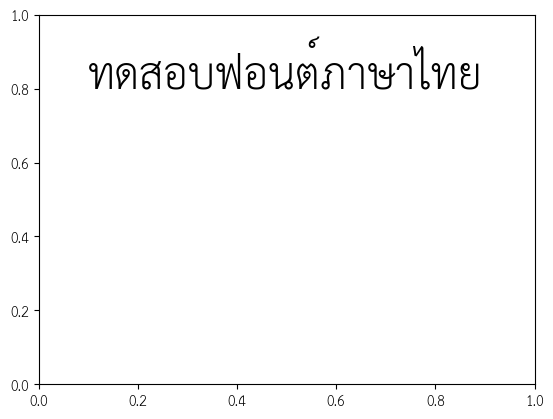

In [ ]:
# install Thai Font on Colab env.
!wget "https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf" -O "thsarabunnew-webfont.ttf"
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')
plt.text(0.1, 0.8, 'ทดสอบฟอนต์ภาษาไทย', {'size': 30})


In [ ]:
df = pd.read_csv('amazon.csv')
df.head()
print(df)

              asin                                              title  \
0       B00TZE87S4  Adult Children of Emotionally Immature Parents...   
1       B08WCKY8MB  From Strength to Strength: Finding Success, Ha...   
2       B09KPS84CJ  Good Inside: A Guide to Becoming the Parent Yo...   
3       B07S7QPG6J             Everything I Know About Love: A Memoir   
4       B00N6PEQV0  The Seven Principles for Making Marriage Work:...   
...            ...                                                ...   
133097  B0C3SJDLK8                                      Anna Karenina   
133098  B09DW752Y1  Scary Smart: Scary Smart: The Future of Artifi...   
133099  B0CFWHPJTN  The Count of Monte Cristo: The Original Unabri...   
133100  B0C1KMFXJC                                      War And Peace   
133101  B0BS1KYZB6                                Pride and Prejudice   

                   author                    soldBy  \
0       Lindsay C. Gibson   Amazon.com Services LLC   
1        Arth

# 2. Data Preprocessing (data cleaning)

In [ ]:
# Drop columns that are entirely empty
df = pd.read_csv('amazon.csv')
# Drop columns that are entirely empty
df = df.drop(columns=['imgUrl', 'asin', 'productURL','category_id'])
# Drop columns that are entirely empty
df = df.dropna(axis=0)

# Drop rows with stars equal to 0 or reviews between 0 and 10
df = df[(df['stars'] != 0) & (~df['reviews'].between(0, 10))]

# Reset the index
df = df.reset_index(drop=True)

# Display the updated DataFrame
df.head()

print(df)

                                                   title              author  \
0              The Covenant of Water (Oprah's Book Club)    Abraham Verghese   
1                     Tom Lake: A Reese's Book Club Pick        Ann Patchett   
2                          Lessons in Chemistry: A Novel       Bonnie Garmus   
3              Demon Copperhead: A Pulitzer Prize Winner  Barbara Kingsolver   
4           Hello Beautiful (Oprah's Book Club): A Novel      Ann Napolitano   
...                                                  ...                 ...   
34466     Effortlessly Chic - Your Essential Style Guide         Tracy Ilton   
34467  Raised-Bed Gardening for Beginners: A Complete...          G.F. QUINN   
34468  Super Dog Tricks: Make Your Dog a Super Dog wi...         Sara Carson   
34469  Rock Art Handbook: Techniques and Projects for...     Samantha Sarles   
34470                              Bernie's Mitten Maker           Jen Ellis   

                         soldBy  stars 

# 3. Data Visualization

### 3.1 การวิเคราะห์ความนิยมของหนังสือ

In [ ]:
# Find the top 25 books with the most reviews
top5_books = df.nlargest(25, 'reviews')

# Print the names of the top 25 books along with their categories
print("Top 25 books with the most reviews:")
for idx, (book_name, category_name) in enumerate(zip(top5_books['title'], top5_books['category_name']), start=1):
    print(f"{idx}. {book_name} || Catagory is {category_name}")


Top 25 books with the most reviews:
1. Where the Crawdads Sing || Catagory is Literature & Fiction
2. The Nightingale: A Novel || Catagory is Literature & Fiction
3. Reminders of Him: A Novel || Catagory is Literature & Fiction
4. The Midnight Library: A Novel || Catagory is Literature & Fiction
5. Eleanor Oliphant Is Completely Fine: A Novel || Catagory is Literature & Fiction
6. Beneath a Scarlet Sky: A Novel || Catagory is Literature & Fiction
7. Lessons in Chemistry: A Novel || Catagory is Literature & Fiction
8. All the Light We Cannot See: A Novel || Catagory is Literature & Fiction
9. Educated: A Memoir || Catagory is Teen & Young Adult
10. The Seven Husbands of Evelyn Hugo: A Novel || Catagory is Literature & Fiction
11. Becoming || Catagory is Biographies & Memoirs
12. A Man Called Ove: A Novel || Catagory is Literature & Fiction
13. Little Fires Everywhere: A Novel || Catagory is Literature & Fiction
14. American Dirt (Oprah's Book Club): A Novel || Catagory is Literature & F

<ipython-input-17-121a1bcf069e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category_name', y='reviews', palette='viridis')


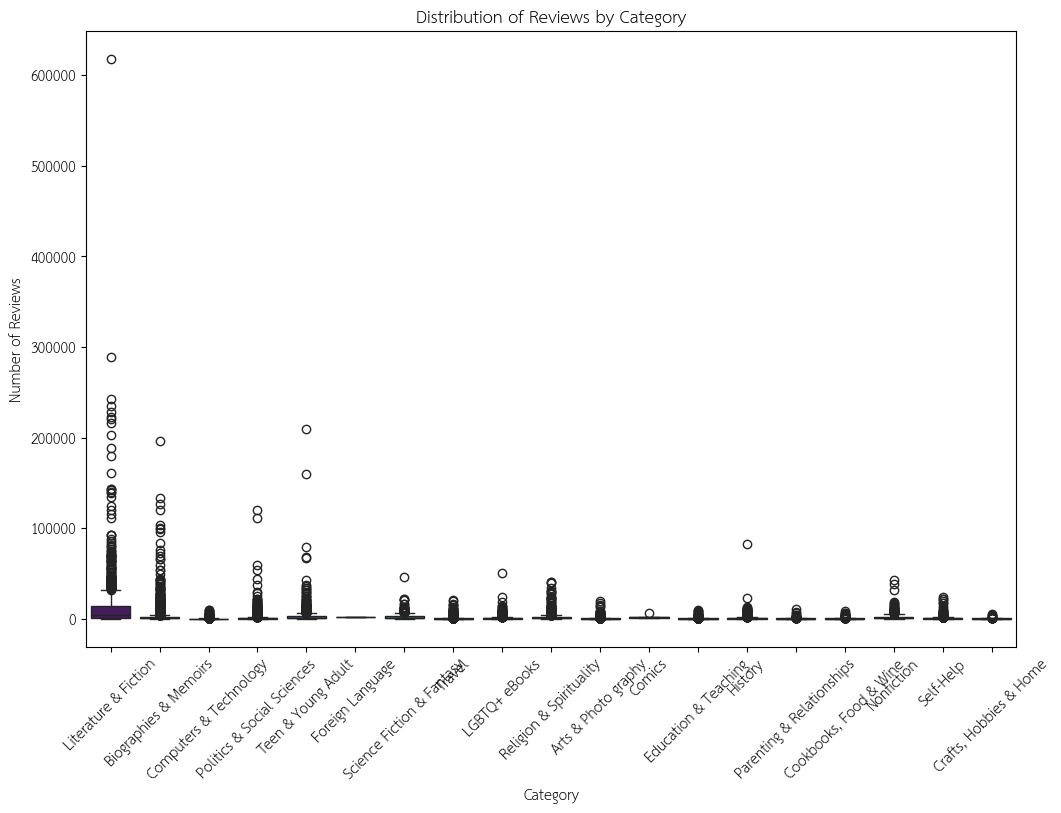

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='category_name', y='reviews', palette='viridis')
plt.title('Distribution of Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

 3.2 isBestSeller vs  Stars (หากมีป้าย Besseller จะมีความนิยมมากขึ้น)


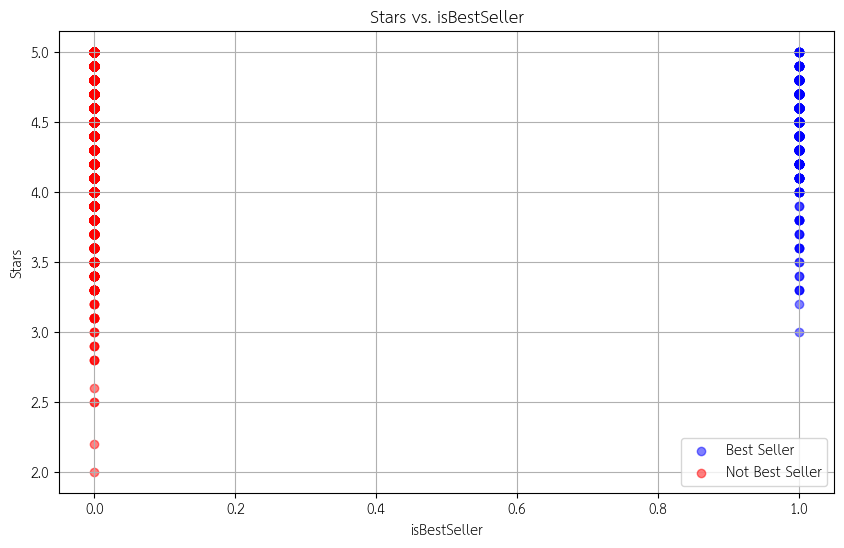

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame

# Separate data for best sellers and non-best sellers
best_sellers = df[df['isBestSeller'] == True]
not_best_sellers = df[df['isBestSeller'] == False]

# Plotting scatter graph for best sellers and non-best sellers
plt.figure(figsize=(10, 6))
plt.scatter(best_sellers['isBestSeller'], best_sellers['stars'], color='blue', label='Best Seller', alpha=0.5)
plt.scatter(not_best_sellers['isBestSeller'], not_best_sellers['stars'], color='red', label='Not Best Seller', alpha=0.5)
plt.title('Stars vs. isBestSeller')
plt.xlabel('isBestSeller')
plt.ylabel('Stars')
plt.legend()
plt.grid(True)
plt.show()


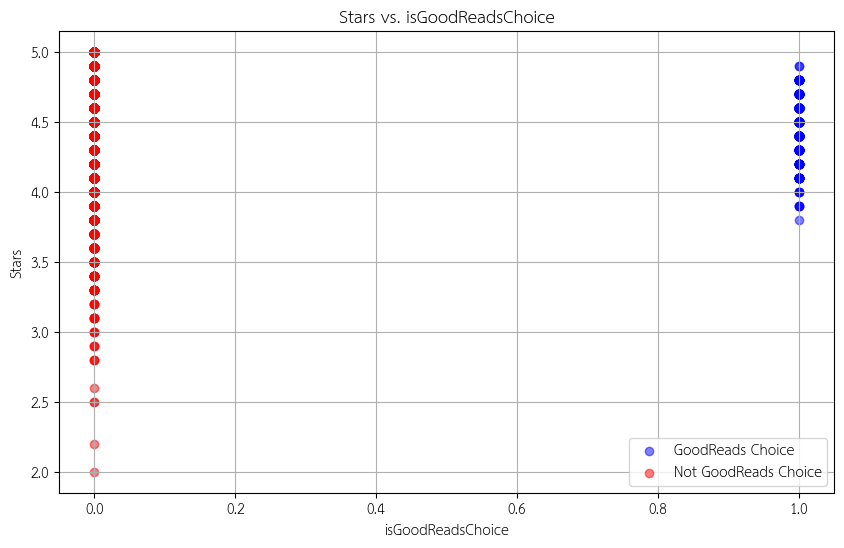

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame

# Plotting scatter graph for isGoodReadsChoice and stars
plt.figure(figsize=(10, 6))

# Scatter plot for True values of isGoodReadsChoice
plt.scatter(df[df['isGoodReadsChoice'] == True]['isGoodReadsChoice'], df[df['isGoodReadsChoice'] == True]['stars'], color='blue', label='GoodReads Choice', alpha=0.5)

# Scatter plot for False values of isGoodReadsChoice
plt.scatter(df[df['isGoodReadsChoice'] == False]['isGoodReadsChoice'], df[df['isGoodReadsChoice'] == False]['stars'], color='red', label='Not GoodReads Choice', alpha=0.5)

plt.title('Stars vs. isGoodReadsChoice')
plt.xlabel('isGoodReadsChoice')
plt.ylabel('Stars')
plt.legend()
plt.grid(True)
plt.show()



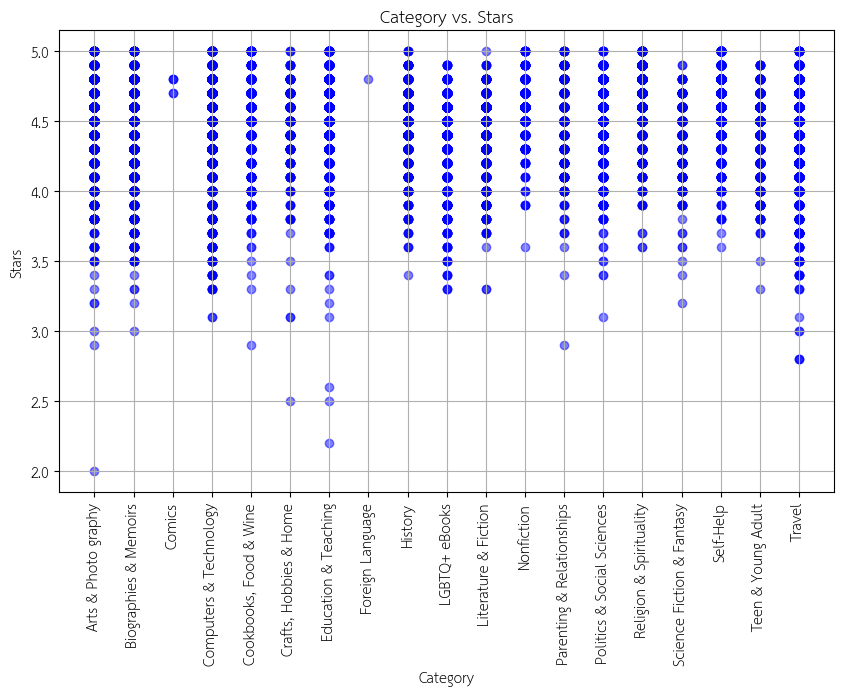

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Encode the category_name column
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category_name'])

# Plotting scatter graph for category_encoded and stars
plt.figure(figsize=(10, 6))
plt.scatter(df['category_encoded'], df['stars'], color='blue', alpha=0.5)
plt.title('Category vs. Stars')
plt.xlabel('Category')
plt.ylabel('Stars')
plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_, rotation=90)
plt.grid(True)
plt.show()


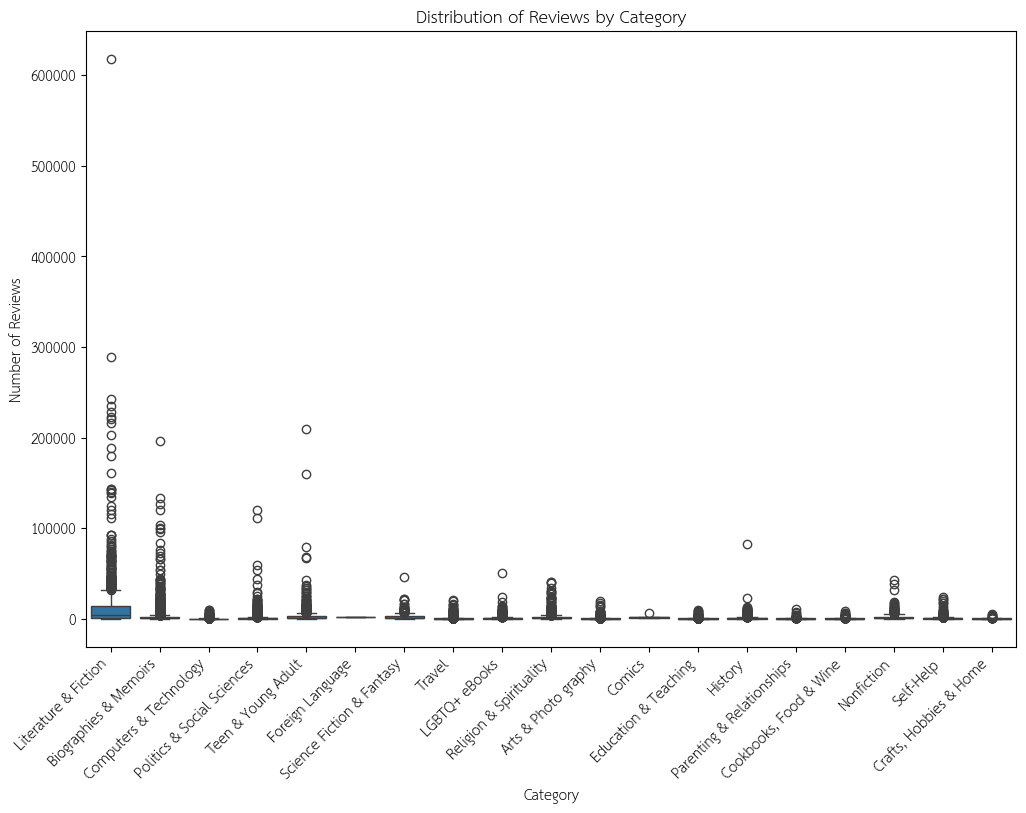

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='category_name', y='reviews')
plt.title('Distribution of Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3.2 จำนวนหนังสือแต่ละหมวดหมู่

['Literature & Fiction' 'Biographies & Memoirs' 'Computers & Technology'
 'Politics & Social Sciences' 'Teen & Young Adult' 'Foreign Language'
 'Science Fiction & Fantasy' 'Travel' 'LGBTQ+ eBooks'
 'Religion & Spirituality' 'Arts & Photo graphy' 'Comics'
 'Education & Teaching' 'History' 'Parenting & Relationships'
 'Cookbooks, Food & Wine' 'Nonfiction' 'Self-Help'
 'Crafts, Hobbies & Home']


<ipython-input-22-60cf4406fe7b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


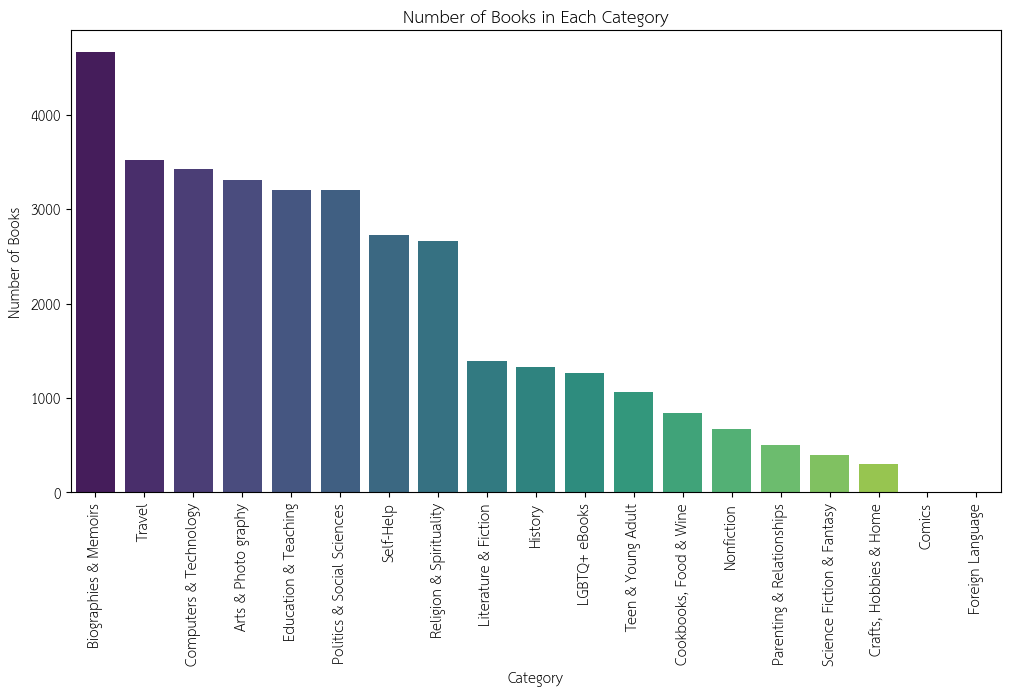

In [ ]:
categories = df['category_name'].unique()
print(categories)
# นับจำนวนหนังสือในแต่ละหมวดหมู่
category_counts = df['category_name'].value_counts()

# สร้างกราฟด้วย matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Category')
plt.show()


### IsGoodReadChoice Vs. Reviews (8)


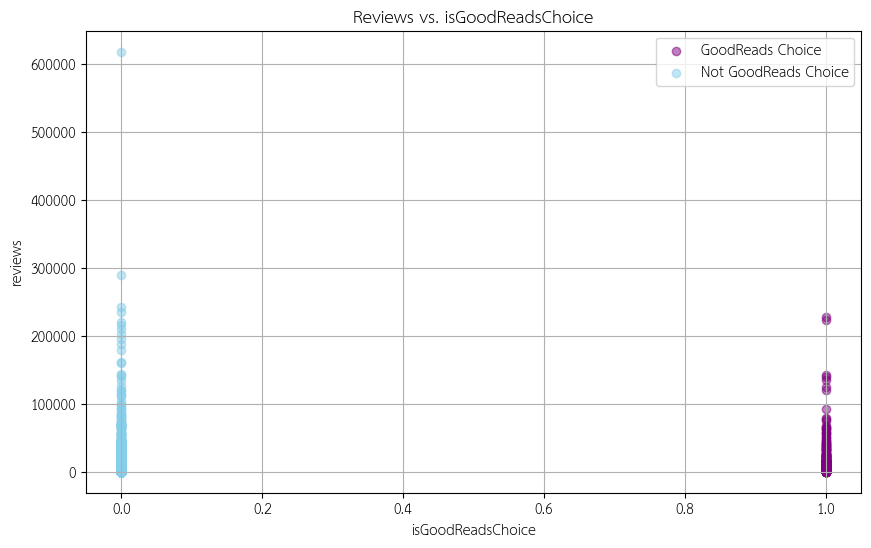

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for True values of isGoodReadsChoice
plt.scatter(df[df['isGoodReadsChoice'] == True]['isGoodReadsChoice'], df[df['isGoodReadsChoice'] == True]['reviews'], color='purple', label='GoodReads Choice', alpha=0.5)

# Scatter plot for False values of isGoodReadsChoice
plt.scatter(df[df['isGoodReadsChoice'] == False]['isGoodReadsChoice'], df[df['isGoodReadsChoice'] == False]['reviews'], color='skyblue', label='Not GoodReads Choice', alpha=0.5)

plt.title('Reviews vs. isGoodReadsChoice')
plt.xlabel('isGoodReadsChoice')
plt.ylabel('reviews')
plt.legend()
plt.grid(True)
plt.show()

### Price Vs. Review

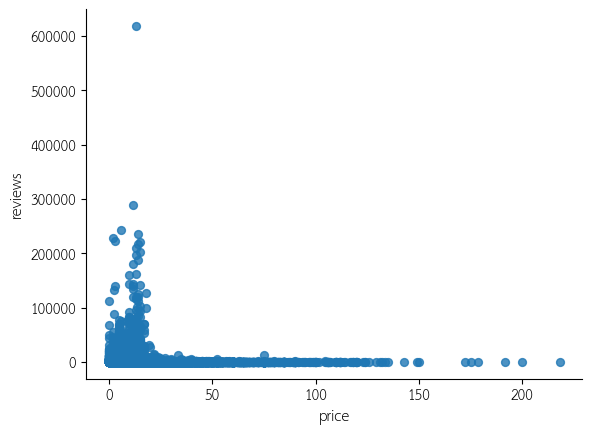

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='reviews', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


### isGoodReadchoice Vs. Stars (6)

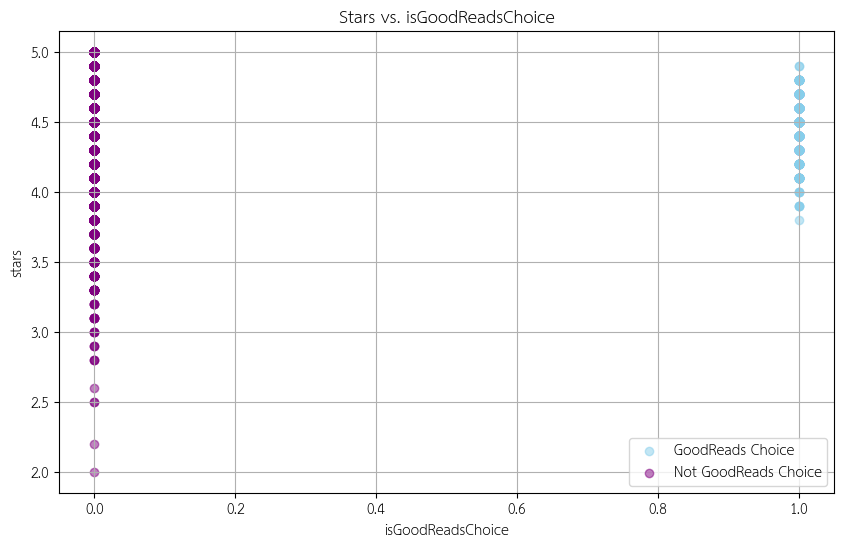

For star rating 1.00-1.99, GoodReads Choice=0, Not GoodReads Choice=0
For star rating 2.00-2.99, GoodReads Choice=0, Not GoodReads Choice=11
For star rating 3.00-3.99, GoodReads Choice=5, Not GoodReads Choice=892
For star rating 4.00-4.99, GoodReads Choice=431, Not GoodReads Choice=32784
For star rating 5.00-5.99, GoodReads Choice=0, Not GoodReads Choice=348


In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for True values of isGoodReadsChoice
plt.scatter(df[df['isGoodReadsChoice'] == True]['isGoodReadsChoice'], df[df['isGoodReadsChoice'] == True]['stars'], color='skyblue', label='GoodReads Choice', alpha=0.5)

# Scatter plot for False values of isGoodReadsChoice
plt.scatter(df[df['isGoodReadsChoice'] == False]['isGoodReadsChoice'], df[df['isGoodReadsChoice'] == False]['stars'], color='purple', label='Not GoodReads Choice', alpha=0.5)

plt.title('Stars vs. isGoodReadsChoice')
plt.xlabel('isGoodReadsChoice')
plt.ylabel('stars')
plt.legend()
plt.grid(True)
plt.show()

for star_rating in range(1, 6):
    lower_bound = star_rating
    upper_bound = star_rating + 0.99
    good_reads_choice_count = df[(df['stars'] >= lower_bound) & (df['stars'] <= upper_bound) & (df['isGoodReadsChoice'] == True)].shape[0]
    not_good_reads_choice_count = df[(df['stars'] >= lower_bound) & (df['stars'] <= upper_bound) & (df['isGoodReadsChoice'] == False)].shape[0]
    print(f"For star rating {lower_bound:.2f}-{upper_bound:.2f}, GoodReads Choice={good_reads_choice_count}, Not GoodReads Choice={not_good_reads_choice_count}")


### isKindleUnlimited Vs. Stars (2)

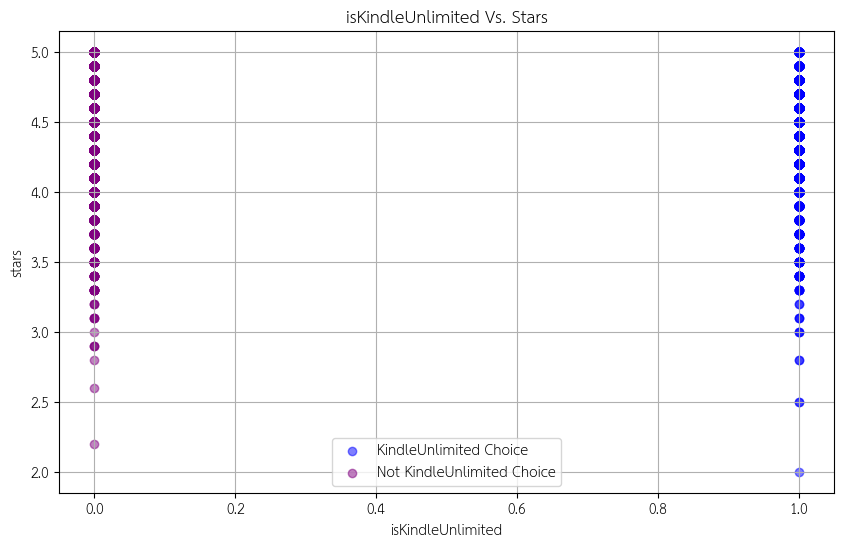

For star rating 1.00-1.99, IsKindleUnlimited = 0, NotIsKindleUnlimited = 0
For star rating 2.00-2.99, IsKindleUnlimited = 5, NotIsKindleUnlimited = 6
For star rating 3.00-3.99, IsKindleUnlimited = 276, NotIsKindleUnlimited = 621
For star rating 4.00-4.99, IsKindleUnlimited = 4953, NotIsKindleUnlimited = 28262


In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for True values of isGoodReadsChoice
plt.scatter(df[df['isKindleUnlimited'] == True]['isKindleUnlimited'], df[df['isKindleUnlimited'] == True]['stars'], color='blue', label='KindleUnlimited Choice', alpha=0.5)

# Scatter plot for False values of isGoodReadsChoice
plt.scatter(df[df['isKindleUnlimited'] == False]['isKindleUnlimited'], df[df['isKindleUnlimited'] == False]['stars'], color='purple', label='Not KindleUnlimited Choice', alpha=0.5)

plt.title('isKindleUnlimited Vs. Stars')
plt.xlabel('isKindleUnlimited')
plt.ylabel('stars')
plt.legend()
plt.grid(True)
plt.show()

for star_rating in range(1, 5):
    lower_bound = star_rating
    upper_bound = star_rating + 0.99
    kindle_unlimited_count = df[(df['stars'] >= lower_bound) & (df['stars'] <= upper_bound) & (df['isKindleUnlimited'] == True)].shape[0]
    not_kindle_unlimited_count = df[(df['stars'] >= lower_bound) & (df['stars'] <= upper_bound) & (df['isKindleUnlimited'] == False)].shape[0]
    print(f"For star rating {lower_bound:.2f}-{upper_bound:.2f}, IsKindleUnlimited = {kindle_unlimited_count}, NotIsKindleUnlimited = {not_kindle_unlimited_count}")


### isKindleUnlimited Vs. Reviews

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for True values of isGoodReadsChoice
plt.scatter(df[df['isKindleUnlimited'] == True]['isKindleUnlimited'], df[df['isKindleUnlimited'] == True]['reviews'], color='purple', label='KindleUnlimited Choice', alpha=0.5)

# Scatter plot for False values of isGoodReadsChoice
plt.scatter(df[df['isKindleUnlimited'] == False]['isKindleUnlimited'], df[df['isKindleUnlimited'] == False]['reviews'], color='blue', label='Not KindleUnlimited Choice', alpha=0.5)

plt.title('isKindleUnlimited Vs. Reviews')
plt.xlabel('isKindleUnlimited')
plt.ylabel('reviews')
plt.legend()
plt.grid(True)
plt.show()

### isGoodReadchoice Vs. Review (8)

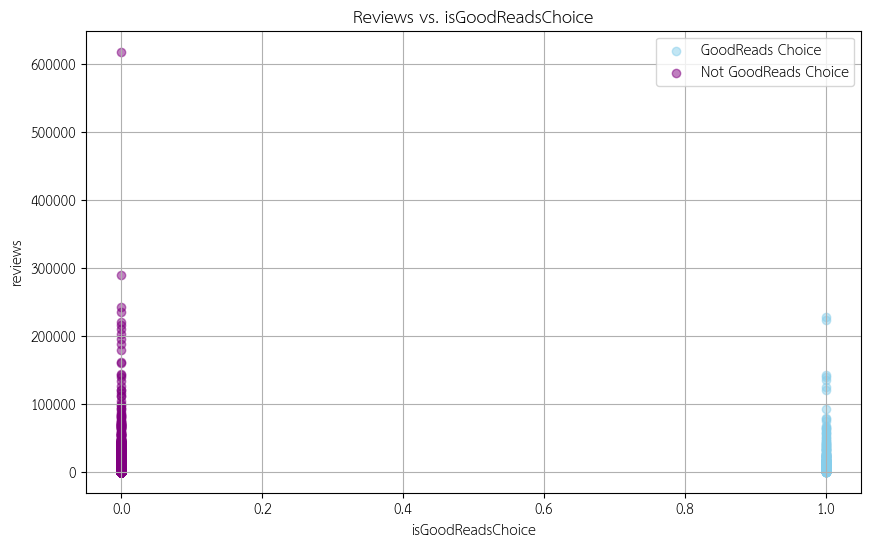

Review 0-10000: GoodReads Choice = 310 / 71.10 % , Not GoodReads Choice = 33314 / 97.88 %
Review 10000-20000: GoodReads Choice = 63 / 14.45 % , Not GoodReads Choice = 414 / 1.22 %
Review 20000-30000: GoodReads Choice = 20 / 4.59 % , Not GoodReads Choice = 126 / 0.37 %
Review 30000-40000: GoodReads Choice = 13 / 2.98 % , Not GoodReads Choice = 66 / 0.19 %
Review 40000-50000: GoodReads Choice = 8 / 1.83 % , Not GoodReads Choice = 40 / 0.12 %
Review 50000-60000: GoodReads Choice = 6 / 1.38 % , Not GoodReads Choice = 14 / 0.04 %
Review 60000-70000: GoodReads Choice = 5 / 1.15 % , Not GoodReads Choice = 17 / 0.05 %
Review 70000-80000: GoodReads Choice = 3 / 0.69 % , Not GoodReads Choice = 8 / 0.02 %
Review 80000-90000: GoodReads Choice = 0 / 0.00 % , Not GoodReads Choice = 7 / 0.02 %
Review 90000-100000: GoodReads Choice = 1 / 0.23 % , Not GoodReads Choice = 4 / 0.01 %
Review 100000-110000: GoodReads Choice = 0 / 0.00 % , Not GoodReads Choice = 2 / 0.01 %
Review 110000-120000: GoodReads Cho

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for True values of isGoodReadsChoice
plt.scatter(df[df['isGoodReadsChoice'] == True]['isGoodReadsChoice'], df[df['isGoodReadsChoice'] == True]['reviews'], color='skyblue', label='GoodReads Choice', alpha=0.5)

# Scatter plot for False values of isGoodReadsChoice
plt.scatter(df[df['isGoodReadsChoice'] == False]['isGoodReadsChoice'], df[df['isGoodReadsChoice'] == False]['reviews'], color='purple', label='Not GoodReads Choice', alpha=0.5)

plt.title('Reviews vs. isGoodReadsChoice')
plt.xlabel('isGoodReadsChoice')
plt.ylabel('reviews')
plt.legend()
plt.grid(True)
plt.show()
total_ngoodreads_choice = df[df['isGoodReadsChoice'] == False].shape[0]
total_goodreads_choice = df[df['isGoodReadsChoice'] == True].shape[0]
for review_count in range(0, 300001, 10000):
    # Filter DataFrame for reviews in the current range
    filtered_df = df[(df['reviews'] >= review_count) & (df['reviews'] < review_count + 10000)]

    # Count the number of GoodReads Choice books in the current range
    true_count = filtered_df[filtered_df['isGoodReadsChoice'] == True].shape[0]
    false_count = filtered_df[filtered_df['isGoodReadsChoice'] == False].shape[0]
    # Calculate the percentage of GoodReads Choice books in the current range from all GoodReads Choice books
    percentageT = (true_count / total_goodreads_choice) * 100
    percentageF = (false_count / total_ngoodreads_choice) * 100
    # Print the counts and percentage
    print(f"Review {review_count}-{review_count + 10000}: GoodReads Choice = {true_count} / {percentageT:.2f} % , Not GoodReads Choice = {false_count} / {percentageF:.2f} %")

### CategoryName vs. Reviews

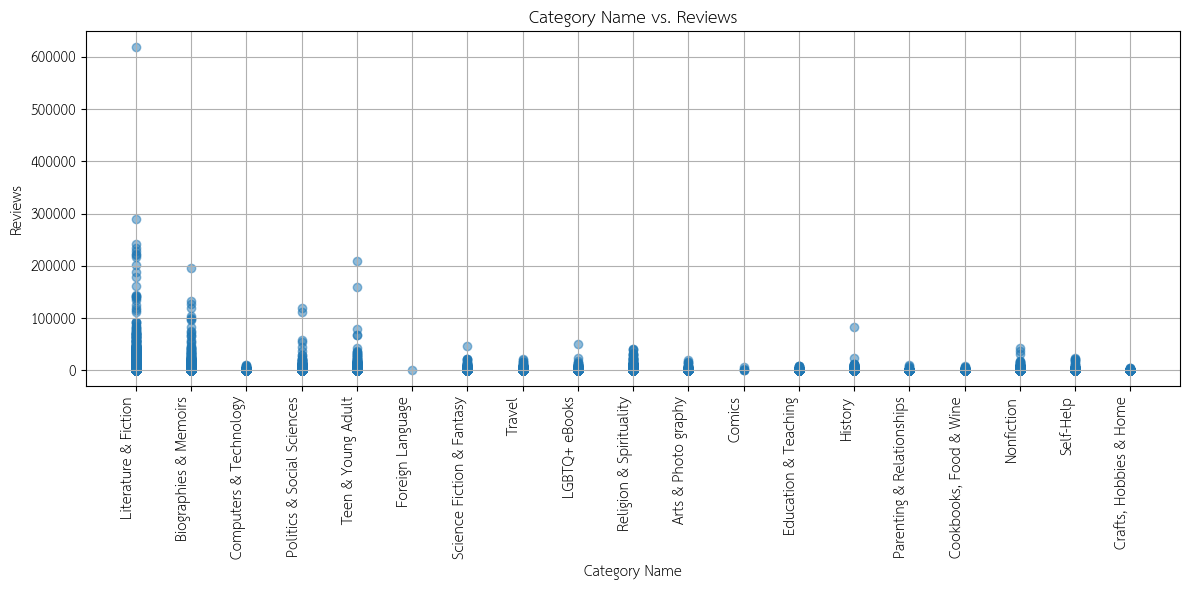

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figsize to (12, 6) for a standard size
plt.scatter(df['category_name'], df['reviews'], alpha=0.5)
plt.title('Category Name vs. Reviews')
plt.xlabel('Category Name')
plt.ylabel('Reviews')
plt.xticks(rotation=90, ha='right')  # Rotate labels 90 degrees for better readability
plt.grid(True)
plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()

### Price Vs. Stars (3)

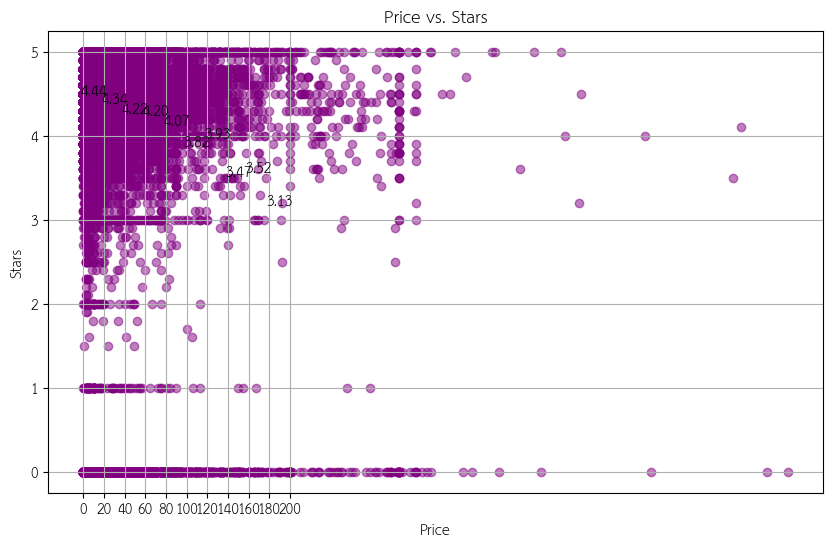

Average star rating for each price range:
price_range
(0, 20]       4.435850
(20, 40]      4.339820
(40, 60]      4.217423
(60, 80]      4.199891
(80, 100]     4.074421
(100, 120]    3.820759
(120, 140]    3.926829
(140, 160]    3.471598
(160, 180]    3.519626
(180, 200]    3.128750
Name: stars, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already read the CSV file into a DataFrame called 'df'

# Define price bins
price_bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

# Create a new column in the DataFrame to represent the price range
df['price_range'] = pd.cut(df['price'], bins=price_bins)

# Calculate the average star rating for each price range
avg_star_by_price_range = df.groupby('price_range')['stars'].mean()

# Plotting scatter graph for price and stars
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['stars'], color='purple', alpha=0.5)
plt.title('Price vs. Stars')
plt.xlabel('Price')
plt.ylabel('Stars')
plt.grid(True)

# Set custom x-axis labels for price ranges
plt.xticks(price_bins)

# Show average star rating for each price range on the plot
for price_range, avg_star in avg_star_by_price_range.items():
    plt.text(price_range.mid, avg_star, f'{avg_star:.2f}', ha='center', va='bottom')

plt.show()

# Print the average star rating for each price range
print("Average star rating for each price range:")
print(avg_star_by_price_range)


### 3.3 ความสัมพันธ์ระหว่างราคา,รีวิว และดาว



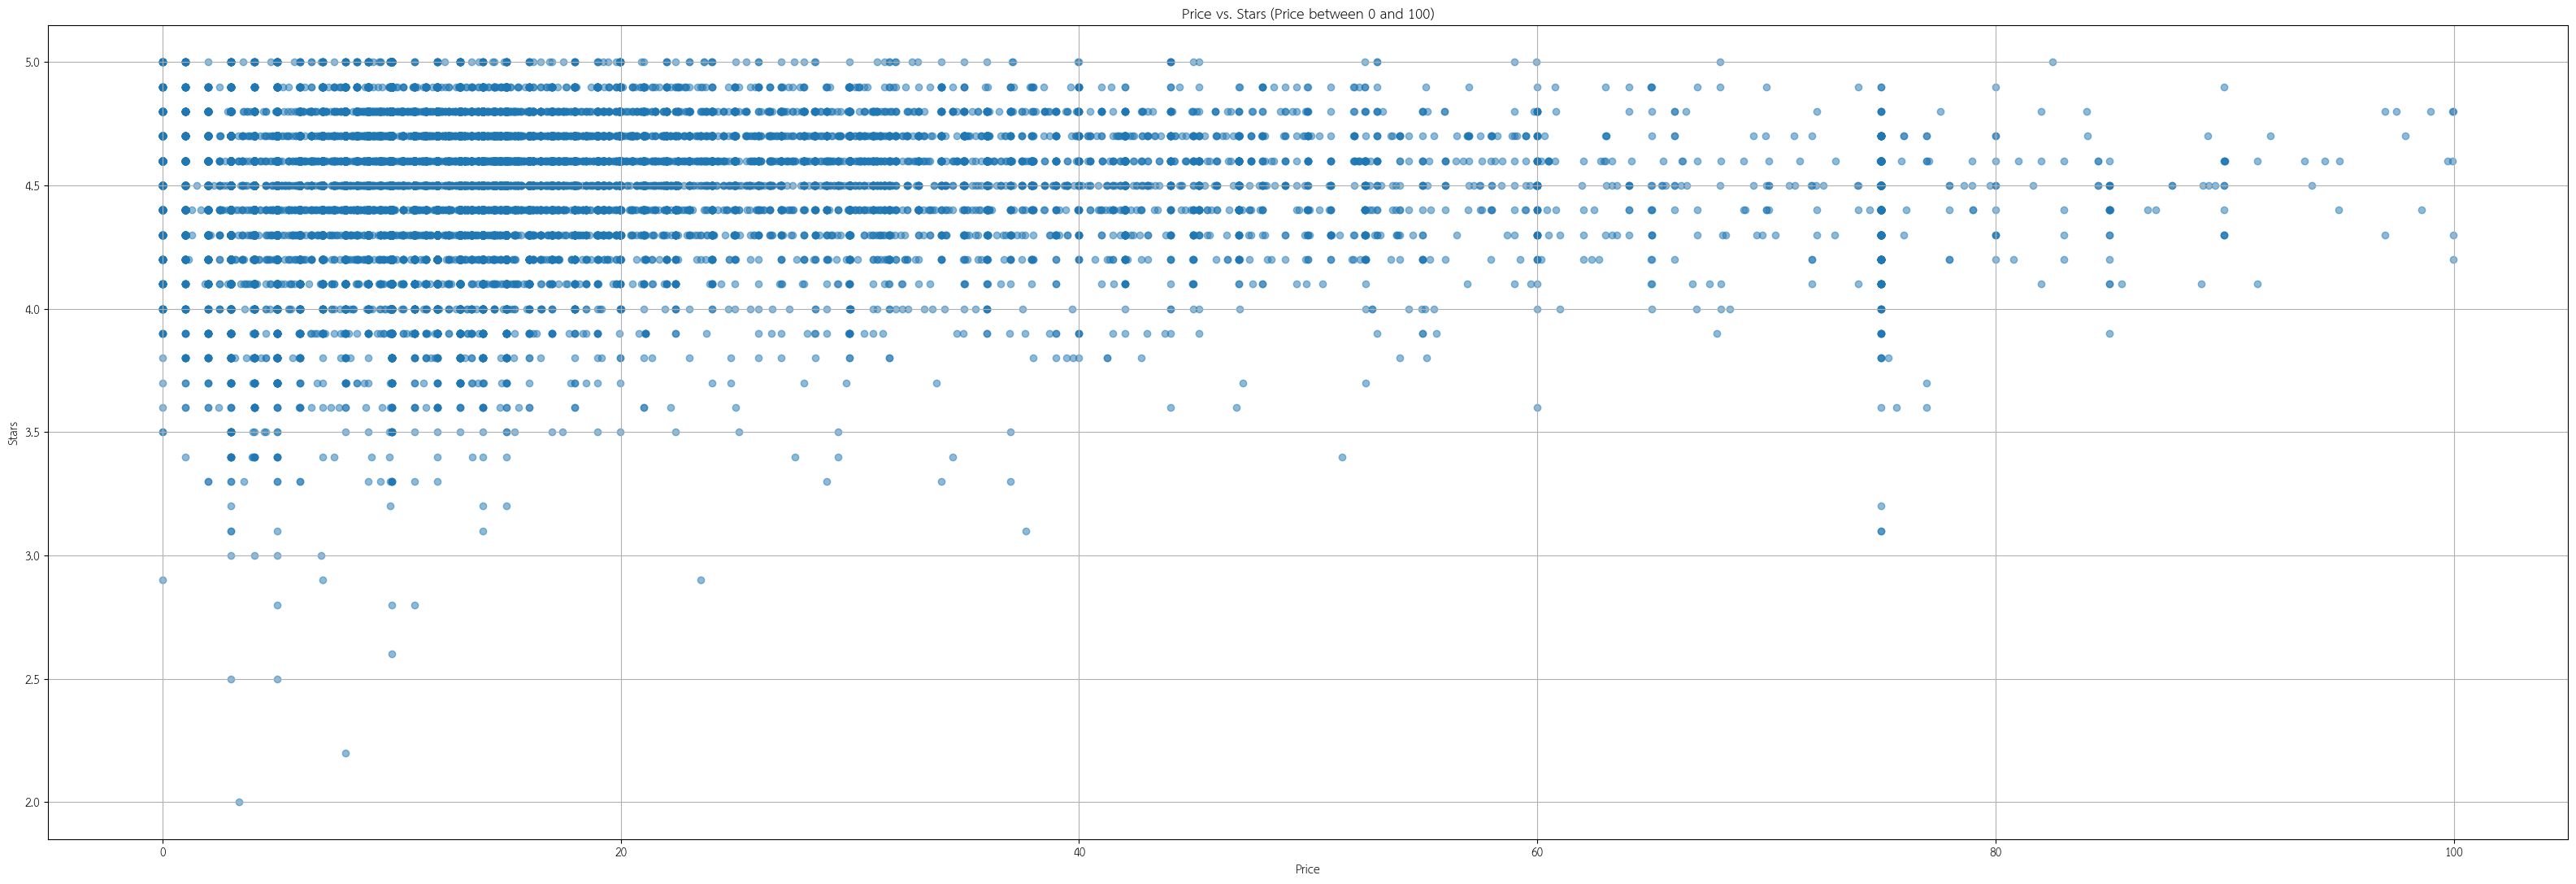

Number of books in range 0-20 $: 29432, Average stars: 4.51, Average reviews: 1680.32
Number of books in range 21-40 $: 3020, Average stars: 4.54, Average reviews: 215.37
Number of books in range 41-60 $: 1116, Average stars: 4.50, Average reviews: 156.10
Number of books in range 61-80 $: 489, Average stars: 4.43, Average reviews: 162.90
Number of books in range 81-100 $: 73, Average stars: 4.48, Average reviews: 136.66


In [ ]:
filtered_df = df[(df['price'] >= 0) & (df['price'] <= 100)]

# Increase the size of the plot
plt.figure(figsize=(40, 13))

# Plot the filtered data
plt.scatter(filtered_df['price'], filtered_df['stars'], alpha=0.5)
plt.title('Price vs. Stars (Price between 0 and 100)')
plt.xlabel('Price')
plt.ylabel('Stars')
plt.grid(True)
plt.show()

counts = []
avg_stars = []
avg_reviews = []

# Define the price ranges
ranges = [(0, 20), (21, 40), (41, 60), (61, 80), (81, 100)]

# Iterate over the ranges
for start, end in ranges:
    # Filter the DataFrame for books within the current range
    filtered_df = df[(df['price'] >= start) & (df['price'] <= end)]
    # Calculate the average star rating and review score for the filtered DataFrame
    avg_star = filtered_df['stars'].mean()
    avg_review = filtered_df['reviews'].mean()
    # Append the count, average star rating, and average review score to the respective lists
    counts.append(len(filtered_df))
    avg_stars.append(avg_star)
    avg_reviews.append(avg_review)

# Print the counts, average stars, and average reviews for each range
for i, (start, end) in enumerate(ranges):
    print(f"Number of books in range {start}-{end} $: {counts[i]}, Average stars: {avg_stars[i]:.2f}, Average reviews: {avg_reviews[i]:.2f}")

### 3.4 Reviews Vs. Stars (4)

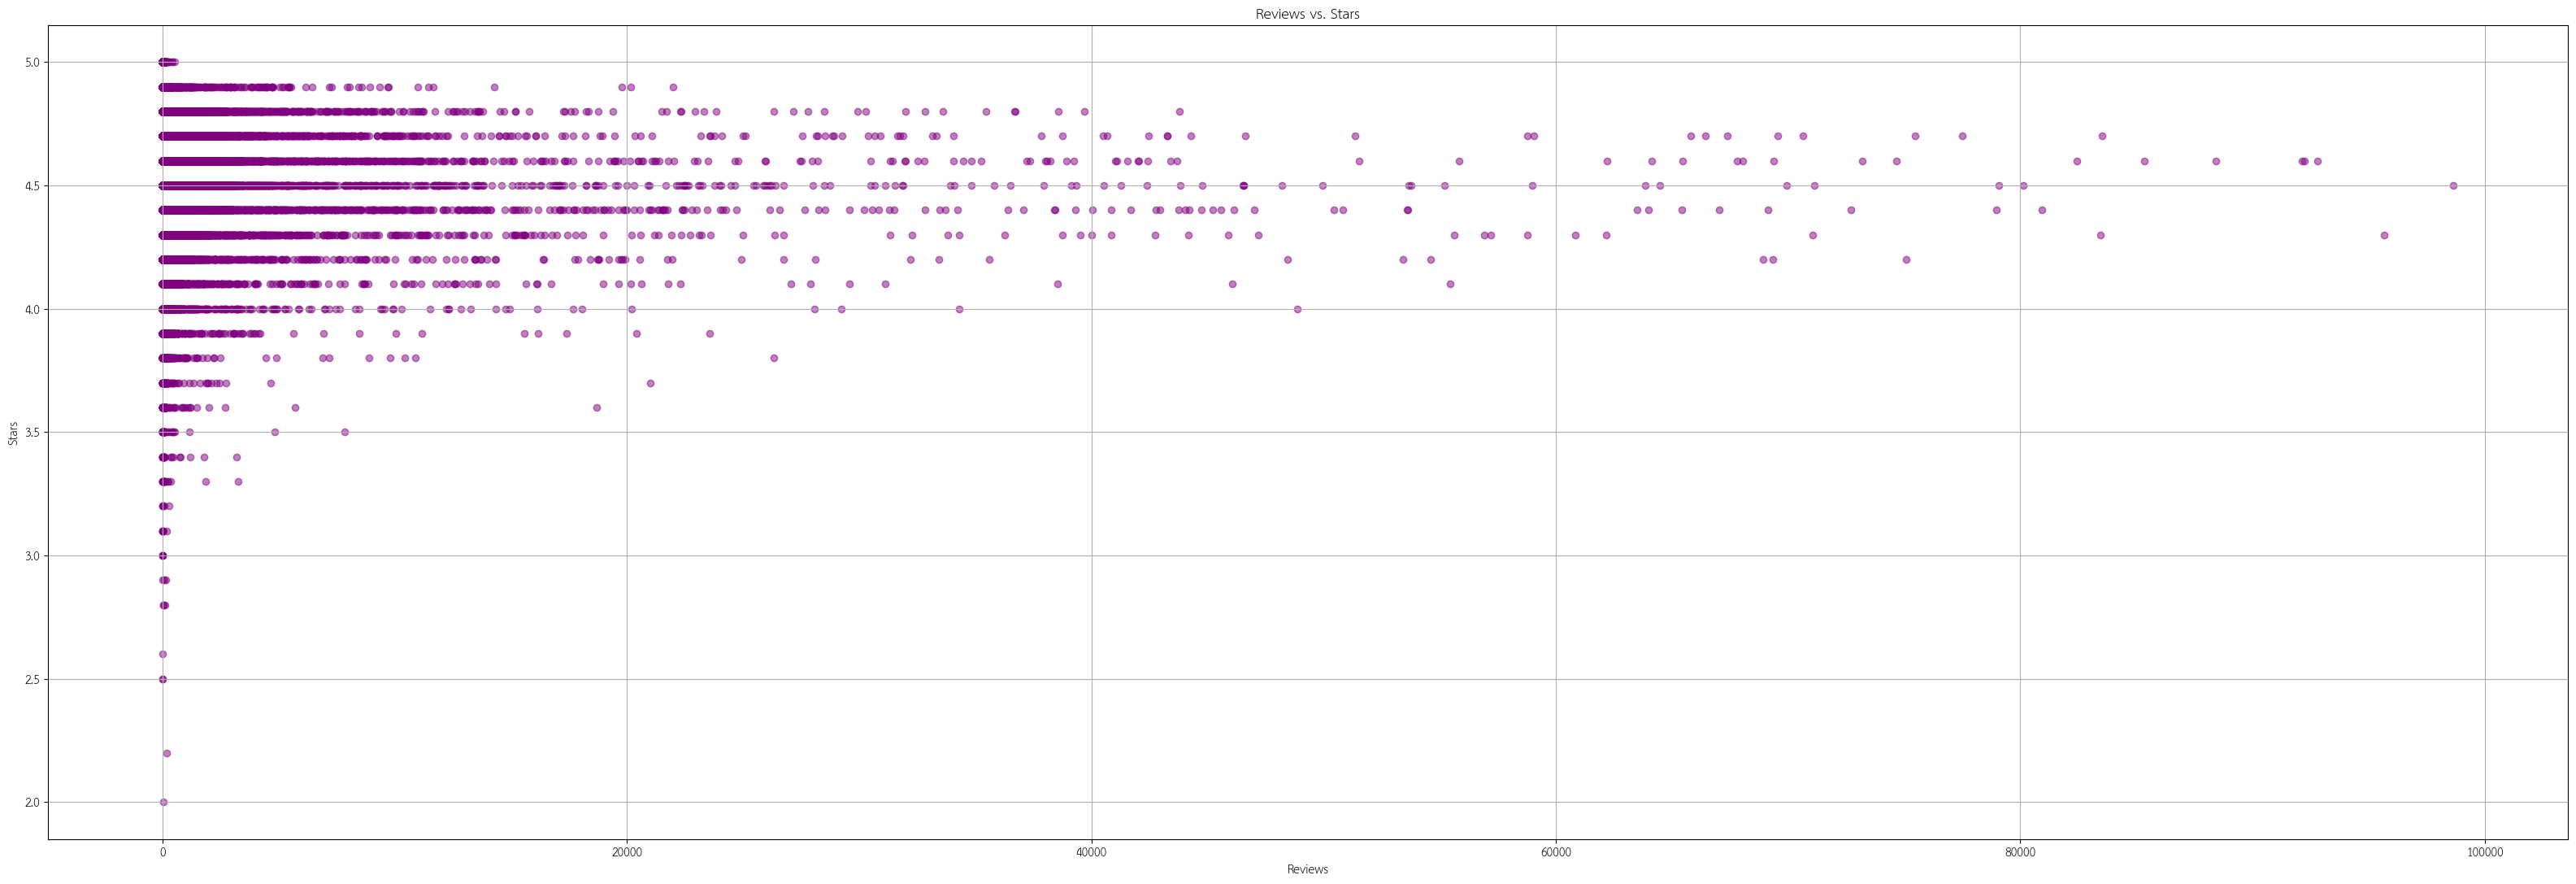

  star_range      reviews
0        0-1          NaN
1        1-2    48.000000
2        2-3    54.000000
3        3-4   875.225080
4        4-5  1320.859047


In [ ]:
filtered_df = df[df['reviews'] <= 100000]

plt.figure(figsize=(40, 13))
plt.scatter(filtered_df['reviews'], filtered_df['stars'],color='purple', alpha=0.5)
plt.title('Reviews vs. Stars')
plt.xlabel('Reviews')
plt.ylabel('Stars')
plt.grid(True)
plt.show()

filtered_df = df[df['reviews'] <= 100000].copy()

# Create bins for the stars
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
filtered_df['star_range'] = pd.cut(filtered_df['stars'], bins=bins, labels=labels, include_lowest=True)

# Calculate the average review score for each range of stars
avg_review_score = filtered_df.groupby('star_range')['reviews'].mean().reset_index()

# Display the average review score for each range of stars
print(avg_review_score)

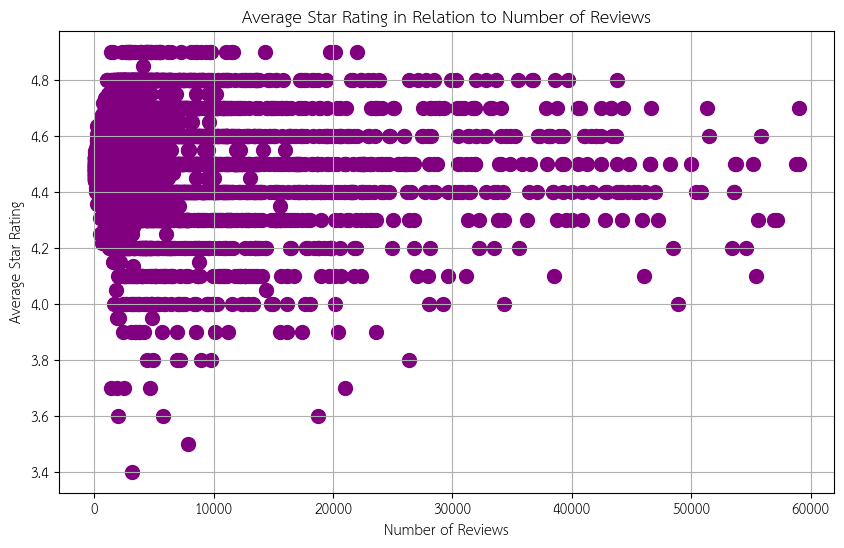

Average Star Rating and Number of Reviews for Each Range of Review Counts:
  review_range  Average Star Rating  Number of Reviews
0      0-10000             4.509431              33624
1  10000-20000             4.461426                477
2  20000-30000             4.471233                146
3  30000-40000             4.521519                 79
4  40000-50000             4.475000                 48
5  50000-60000             4.430000                 20


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing columns 'reviews' and 'stars'

# Filter the DataFrame for review counts less than or equal to 60,000
filtered_df = df[df['reviews'] <= 60000].copy()

# Calculate the average star rating for each review count
avg_star_rating = filtered_df.groupby('reviews')['stars'].mean().reset_index()

# Visualize the average star rating in relation to the number of reviews
plt.figure(figsize=(10, 6))
plt.scatter(avg_star_rating['reviews'], avg_star_rating['stars'], color='purple', s=100)
plt.title('Average Star Rating in Relation to Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Star Rating')
plt.grid(True)
plt.show()
# Create bins for the review counts
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000]
labels = ['0-10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000']
filtered_df['review_range'] = pd.cut(filtered_df['reviews'], bins=bins, labels=labels, include_lowest=True)

# Calculate the average star rating and number of reviews for each range of review counts
avg_star_rating = filtered_df.groupby('review_range').agg({'stars': 'mean', 'reviews': 'count'}).reset_index()

# Rename the columns for clarity
avg_star_rating.rename(columns={'stars': 'Average Star Rating', 'reviews': 'Number of Reviews'}, inplace=True)

# Display the average star rating and number of reviews for each range of review counts
print("Average Star Rating and Number of Reviews for Each Range of Review Counts:")
print(avg_star_rating)

### price vs isGoodReadsChoice (7)

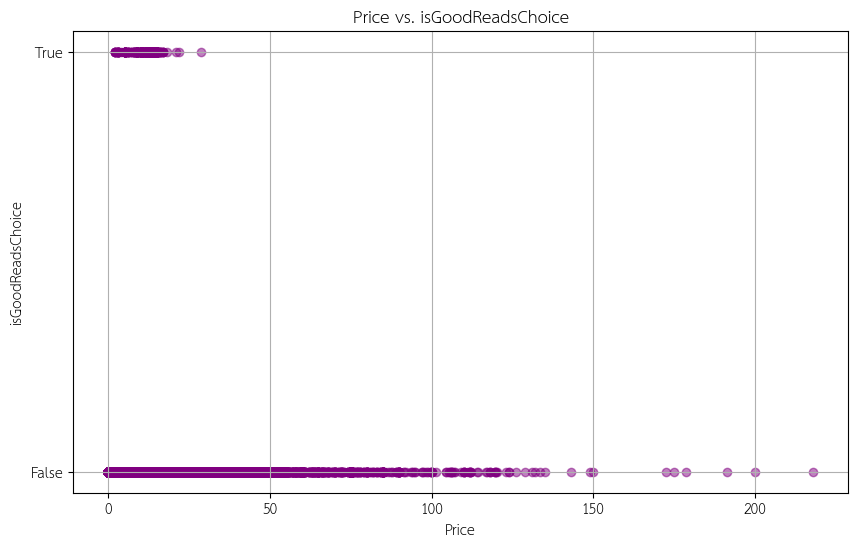

For price range $0-20, GoodReads Choice=433, Not GoodReads Choice=28999
For price range $21-40, GoodReads Choice=2, Not GoodReads Choice=3018
For price range $41-inf, GoodReads Choice=0, Not GoodReads Choice=1750


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['isGoodReadsChoice'],color='purple', alpha=0.5)
plt.title('Price vs. isGoodReadsChoice')
plt.xlabel('Price')
plt.ylabel('isGoodReadsChoice')
plt.yticks([0, 1], ['False', 'True'])  # Set y-axis ticks to display 'False' and 'True'
plt.grid(True)
plt.show()

# Define price ranges
price_ranges = [(0, 20), (21, 40), (41, float('inf'))]

for price_range in price_ranges:
    lower_bound, upper_bound = price_range
    good_reads_choice_count = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound) & (df['isGoodReadsChoice'] == True)].shape[0]
    not_good_reads_choice_count = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound) & (df['isGoodReadsChoice'] == False)].shape[0]
    print(f"For price range ${lower_bound}-{upper_bound}, GoodReads Choice={good_reads_choice_count}, Not GoodReads Choice={not_good_reads_choice_count}")


### price vs Bestseller

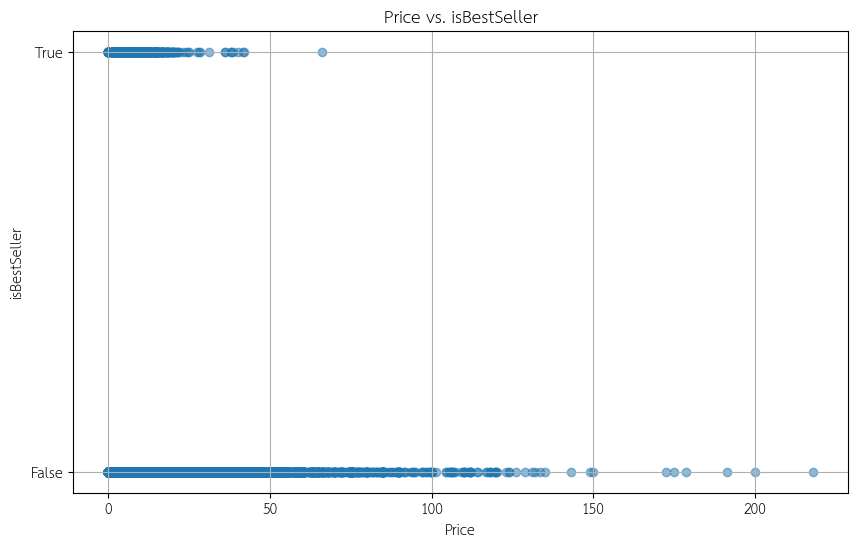

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['isBestSeller'], alpha=0.5)
plt.title('Price vs. isBestSeller')
plt.xlabel('Price')
plt.ylabel('isBestSeller')
plt.yticks([0, 1], ['False', 'True'])  # Set y-axis ticks to display 'False' and 'True'
plt.grid(True)
plt.show()


### price vs Bestseller vs isGoodReadsChoice

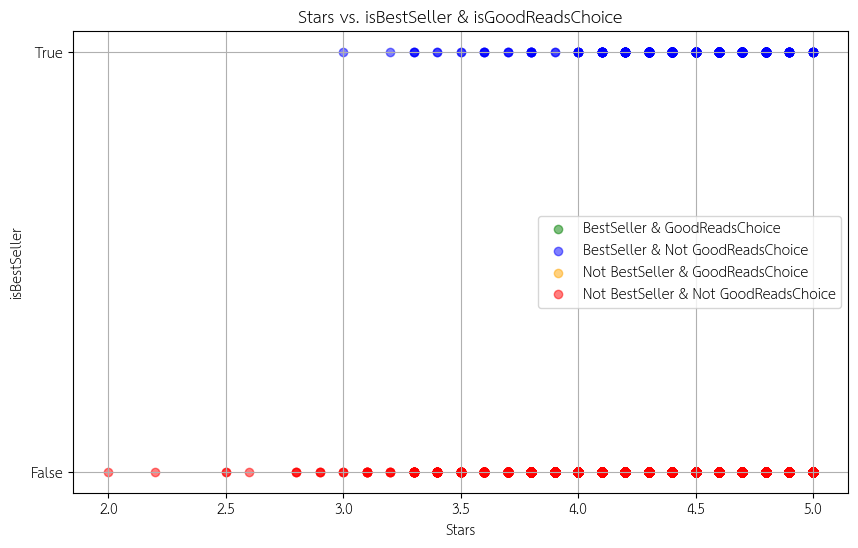

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for isBestSeller == True and isGoodReadsChoice == True
plt.scatter(df[df['isBestSeller'] & df['isGoodReadsChoice']]['stars'], df[(df['isBestSeller'] & df['isGoodReadsChoice'])]['isBestSeller'], color='green', label='BestSeller & GoodReadsChoice', alpha=0.5)

# Scatter plot for isBestSeller == True and isGoodReadsChoice == False
plt.scatter(df[df['isBestSeller'] & ~df['isGoodReadsChoice']]['stars'], df[(df['isBestSeller'] & ~df['isGoodReadsChoice'])]['isBestSeller'], color='blue', label='BestSeller & Not GoodReadsChoice', alpha=0.5)

# Scatter plot for isBestSeller == False and isGoodReadsChoice == True
plt.scatter(df[~df['isBestSeller'] & df['isGoodReadsChoice']]['stars'], df[(~df['isBestSeller'] & df['isGoodReadsChoice'])]['isBestSeller'], color='orange', label='Not BestSeller & GoodReadsChoice', alpha=0.5)

# Scatter plot for isBestSeller == False and isGoodReadsChoice == False
plt.scatter(df[~df['isBestSeller'] & ~df['isGoodReadsChoice']]['stars'], df[(~df['isBestSeller'] & ~df['isGoodReadsChoice'])]['isBestSeller'], color='red', label='Not BestSeller & Not GoodReadsChoice', alpha=0.5)

plt.title('Stars vs. isBestSeller & isGoodReadsChoice')
plt.xlabel('Stars')
plt.ylabel('isBestSeller')
plt.yticks([0, 1], ['False', 'True'])
plt.legend()
plt.grid(True)
plt.show()


### 3.5 Category_name Vs. Star (1)


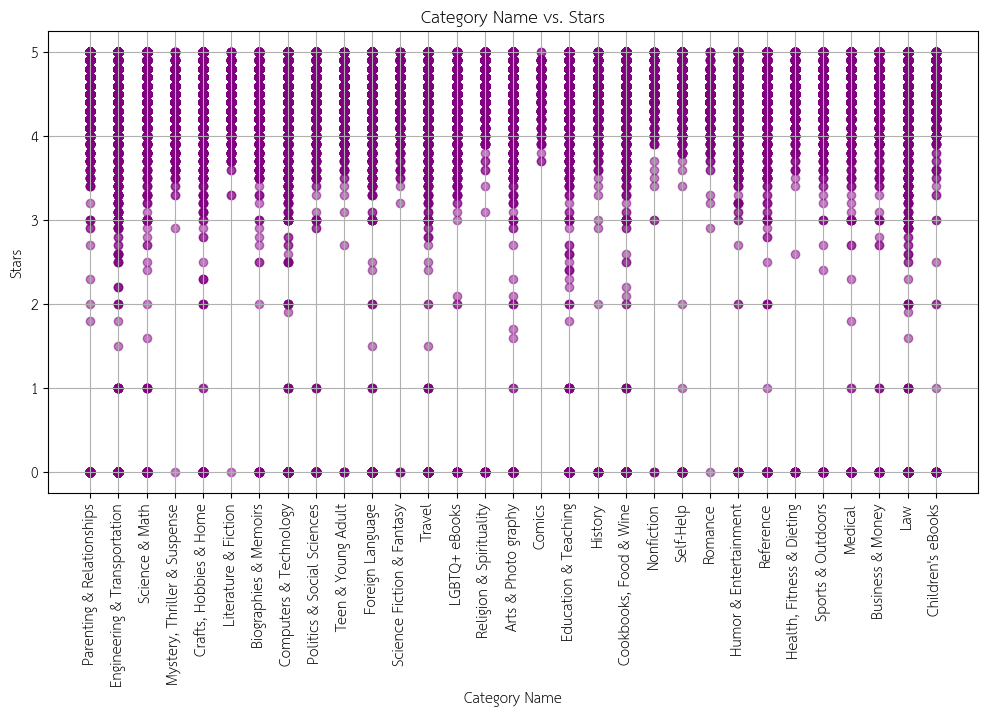

                              2.00-2.99_star  3.00-3.49_star  3.50-3.99_star  4.00-4.49_star  4.50-4.99_star
category_name                                                                                               
Arts & Photo graphy                       13              27             189            2031            2530
Biographies & Memoirs                      9              15             279            2857            2206
Business & Money                           8              10              71            1121            1314
Children's eBooks                          5               5              39            1169            4498
Comics                                     0               0              13             169             296
Computers & Technology                    34              69             339            2506            2248
Cookbooks, Food & Wine                    22              19             214            2087            2815
Crafts, Hobbies & H

In [ ]:

plt.figure(figsize=(12, 6))  # Set the figsize to (12, 6) for a standard size
plt.scatter(df['category_name'], df['stars'],color='purple',alpha=0.5)
plt.title('Category Name vs. Stars')
plt.xlabel('Category Name')
plt.ylabel('Stars')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

star_bins = [2, 3, 3.5, 4, 4.5, 5]
star_labels = ['2.00-2.99', '3.00-3.49', '3.50-3.99', '4.00-4.49', '4.50-4.99']
df['star_range'] = pd.cut(df['stars'], bins=star_bins, labels=star_labels, include_lowest=True)

category_counts = df.groupby(['category_name', 'star_range']).size().unstack(fill_value=0)
category_counts.columns = [f"{col}_star" for col in category_counts.columns]

# Display the counts
pd.set_option('display.max_rows', 20)  # Set the maximum number of rows to display
pd.set_option('display.max_columns', 10)  # Set the maximum number of columns to display
print(category_counts.to_string())

category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_percentages = category_percentages.add_suffix('_percentage')  # Add suffix to column names

print(category_percentages.to_string())

### 3.6 ความสัมพันธ์ระหว่างผู้เขียนและดาว




<ipython-input-27-11a2f24910aa>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_filtered['author'], df_filtered['stars'], alpha=df_filtered['alpha'], cmap='Blues')
<ipython-input-27-11a2f24910aa>:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Number of Books')  # Use the custom colorbar


Author: Amazon.com Services LLC, Avg Star Rating: 4.60
Author: Ann Rule, Avg Star Rating: 4.46
Author: Brian Tracy, Avg Star Rating: 4.58
Author: C. S. Lewis, Avg Star Rating: 4.66
Author: Catherine Ryan Hyde, Avg Star Rating: 4.46
Author: Culture Smart!, Avg Star Rating: 4.55
Author: DK, Avg Star Rating: 4.71
Author: DK Eyewitness, Avg Star Rating: 4.54
Author: David D. Busch, Avg Star Rating: 4.67
Author: David Jeremiah, Avg Star Rating: 4.78
Author: Elin Hilderbrand, Avg Star Rating: 4.37
Author: Fodor's Travel Guides, Avg Star Rating: 4.49
Author: Harper Bliss, Avg Star Rating: 4.52
Author: John C. Maxwell, Avg Star Rating: 4.72
Author: Joyce Meyer, Avg Star Rating: 4.80
Author: Lingo Mastery, Avg Star Rating: 4.44
Author: Lonely Planet, Avg Star Rating: 4.45
Author: Lynn Austin, Avg Star Rating: 4.67
Author: M. William Phelps, Avg Star Rating: 4.29
Author: Max Lucado, Avg Star Rating: 4.77
Author: Mometrix, Avg Star Rating: 4.33
Author: N. T. Wright, Avg Star Rating: 4.70
Author: 

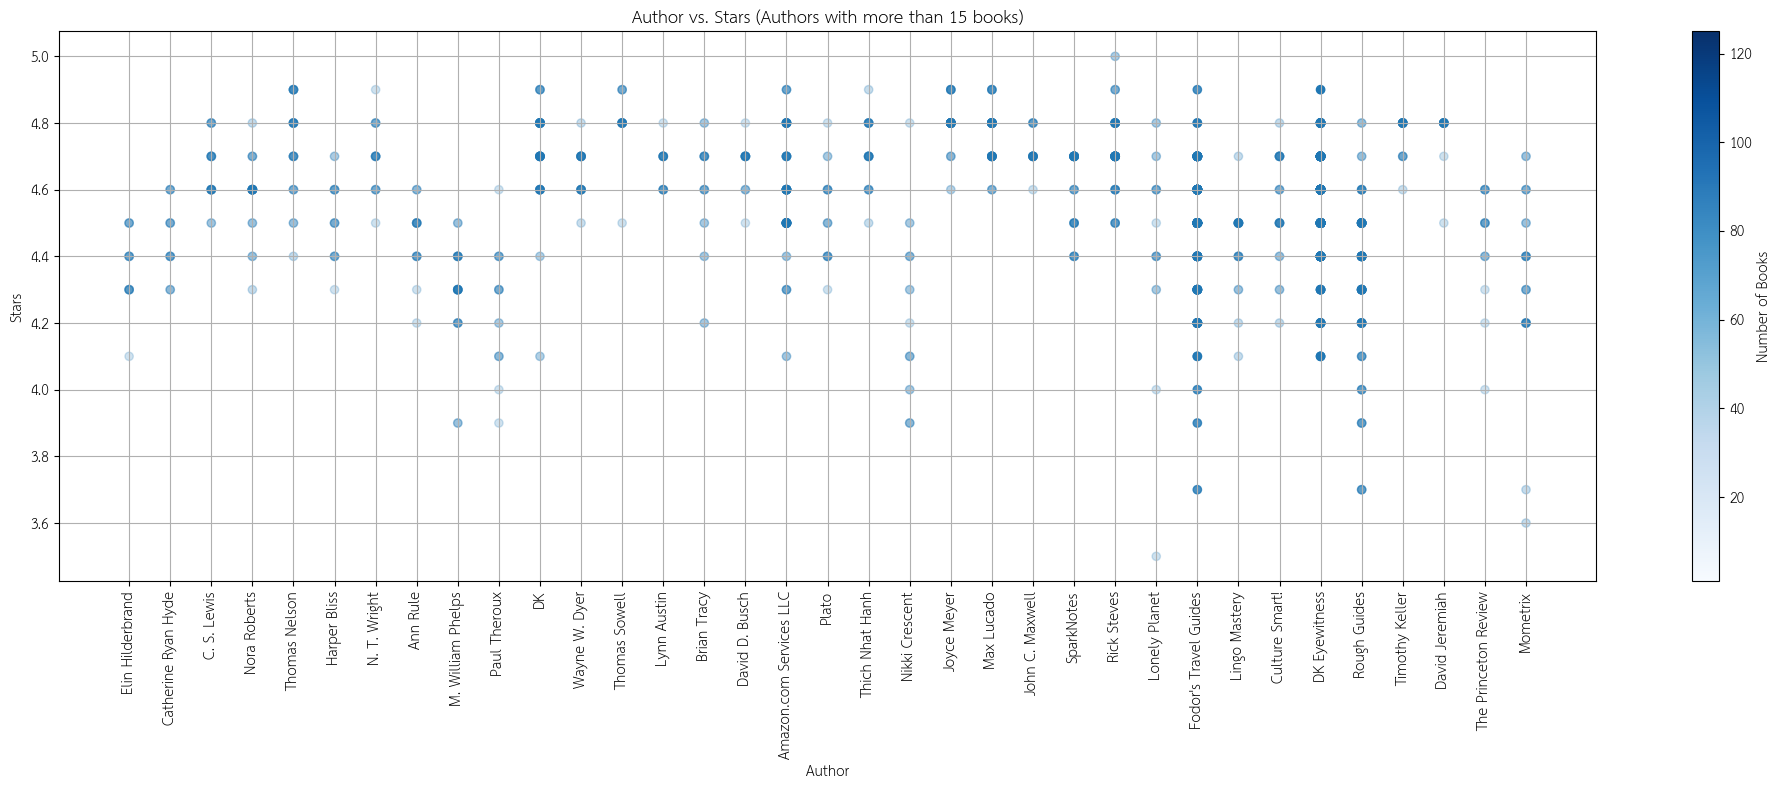

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing book data

# Calculate author counts
author_counts = df['author'].value_counts()

# Filter the DataFrame to include only authors with more than 15 book titles
authors_more_than_15_books = author_counts[author_counts > 15].index

# Filter the DataFrame based on the selected authors
df_filtered = df[df['author'].isin(authors_more_than_15_books)]

# Calculate the average star rating for each author
author_avg_star = df_filtered.groupby('author')['stars'].mean().reset_index()
author_avg_star.columns = ['author', 'stars_avg']  # Rename the columns for consistency

# Merge the average star ratings back to the filtered DataFrame
df_filtered = df_filtered.merge(author_avg_star, on='author')

# Map the number of books to the alpha value
min_books = author_counts.min()
max_books = author_counts.max()
df_filtered['alpha'] = np.interp(author_counts[df_filtered['author']].values, (min_books, max_books), (0.1, 1))

# Create a custom colorbar with the range of number of books
norm = plt.Normalize(min_books, max_books)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])  # Set an empty array to the ScalarMappable

plt.figure(figsize=(20, 8))
plt.scatter(df_filtered['author'], df_filtered['stars'], alpha=df_filtered['alpha'], cmap='Blues')
plt.colorbar(sm, label='Number of Books')  # Use the custom colorbar

plt.title('Author vs. Stars (Authors with more than 15 books)')
plt.xlabel('Author')
plt.ylabel('Stars')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Print author names and average star ratings
for index, row in author_avg_star.iterrows():
    print(f'Author: {row["author"]}, Avg Star Rating: {row["stars_avg"]:.2f}')

plt.show()


### 3.7 soldBy Vs. stars


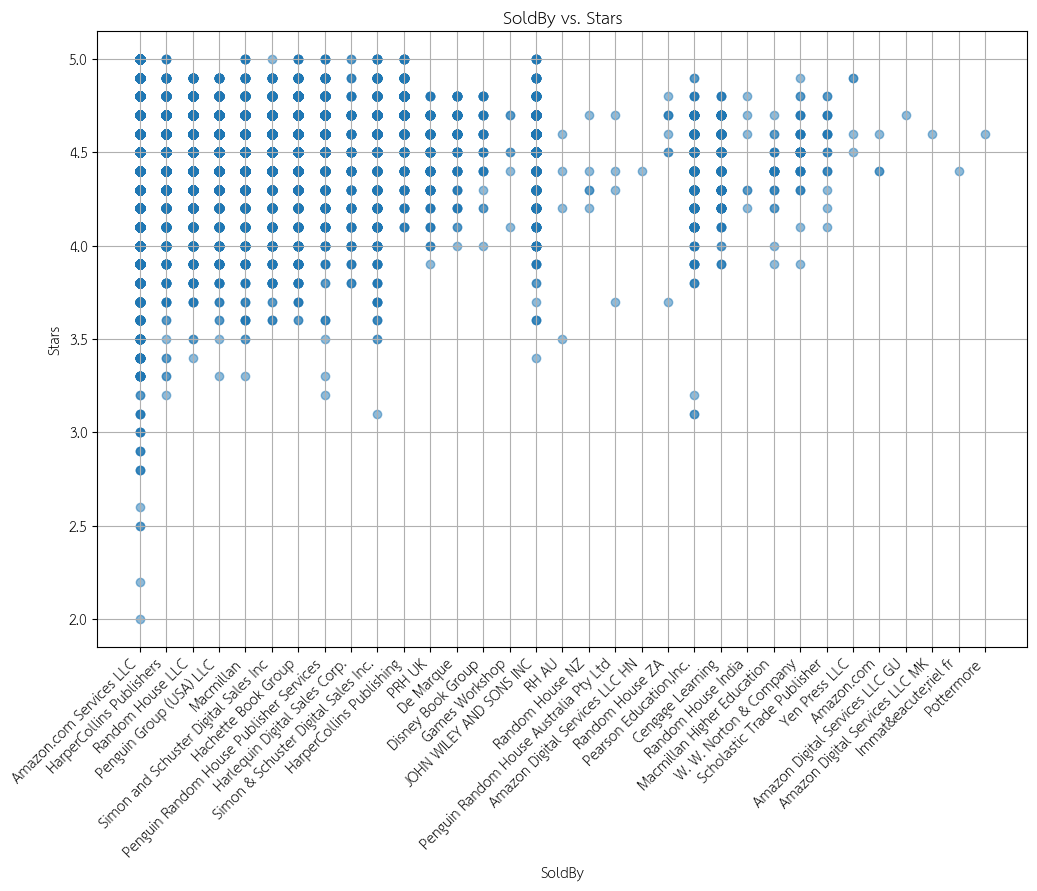

Number of items sold by each 'soldBy' in each star range:
star_range                               2.00-2.99  3.00-3.99  4.00-5.00
soldBy                                                                  
Amazon Digital Services LLC GU                   0          0          1
Amazon Digital Services LLC HN                   0          0          1
Amazon Digital Services LLC MK                   0          0          1
Amazon.com                                       0          0          3
Amazon.com Services LLC                         10        603      19071
Cengage Learning                                 0          3        324
De Marque                                        0          0        104
Disney Book Group                                0          0         38
Games Workshop                                   0          0          6
Hachette Book Group                              0         36       1755
Harlequin Digital Sales Corp.                    0          7     

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['soldBy'], df['stars'], alpha=0.5)
plt.title('SoldBy vs. Stars')
plt.xlabel('SoldBy')
plt.ylabel('Stars')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

# Create a new column to categorize the star ranges
df['star_range'] = pd.cut(df['stars'], bins=[2.0, 2.99, 3.99, 5.0], labels=['2.00-2.99', '3.00-3.99', '4.00-5.00'])

# Group by 'soldBy' and 'star_range' and count the number of occurrences
soldBy_star_counts = df.groupby(['soldBy', 'star_range']).size().unstack(fill_value=0)

# Print the results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Number of items sold by each 'soldBy' in each star range:")
print(soldBy_star_counts)


### 3.8 isBestSeller and review

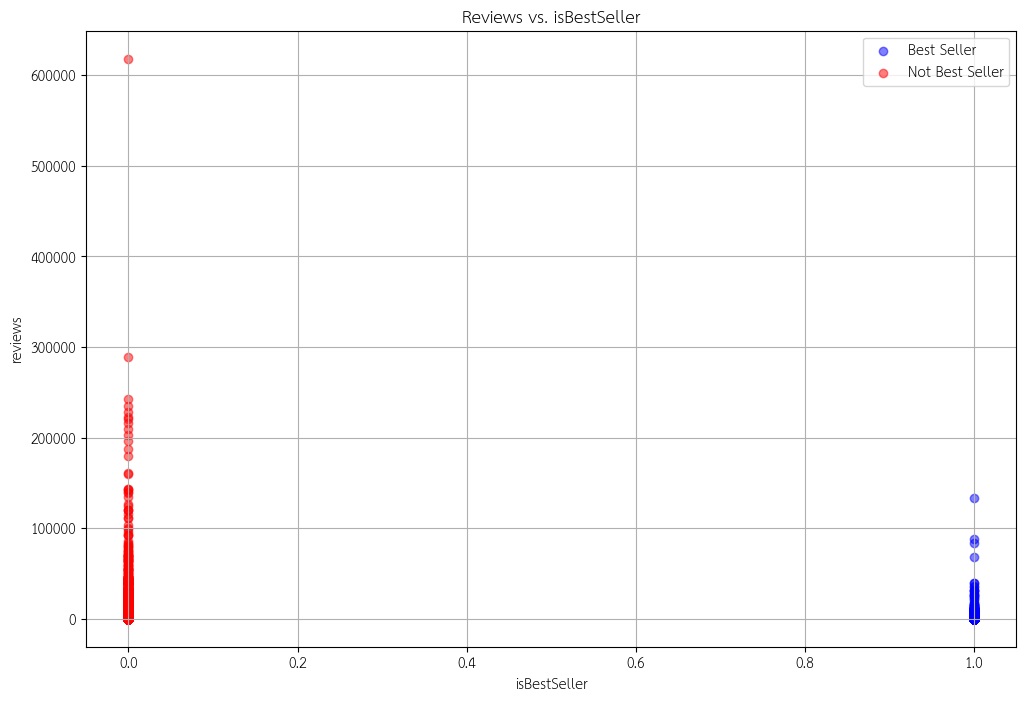

In [ ]:
plt.figure(figsize=(12, 8))  # Increase the figure size for better visualization

# Scatter plot for True values of isBestSeller
plt.scatter(df[df['isBestSeller'] == True]['isBestSeller'], df[df['isBestSeller'] == True]['reviews'], color='blue', label='Best Seller', alpha=0.5)

# Scatter plot for False values of isBestSeller
plt.scatter(df[df['isBestSeller'] == False]['isBestSeller'], df[df['isBestSeller'] == False]['reviews'], color='red', label='Not Best Seller', alpha=0.5)

plt.title('Reviews vs. isBestSeller')
plt.xlabel('isBestSeller')
plt.ylabel('reviews')
plt.legend()
plt.grid(True)
plt.show()


### 3.9 isBestSeller Vs. Stars (5)

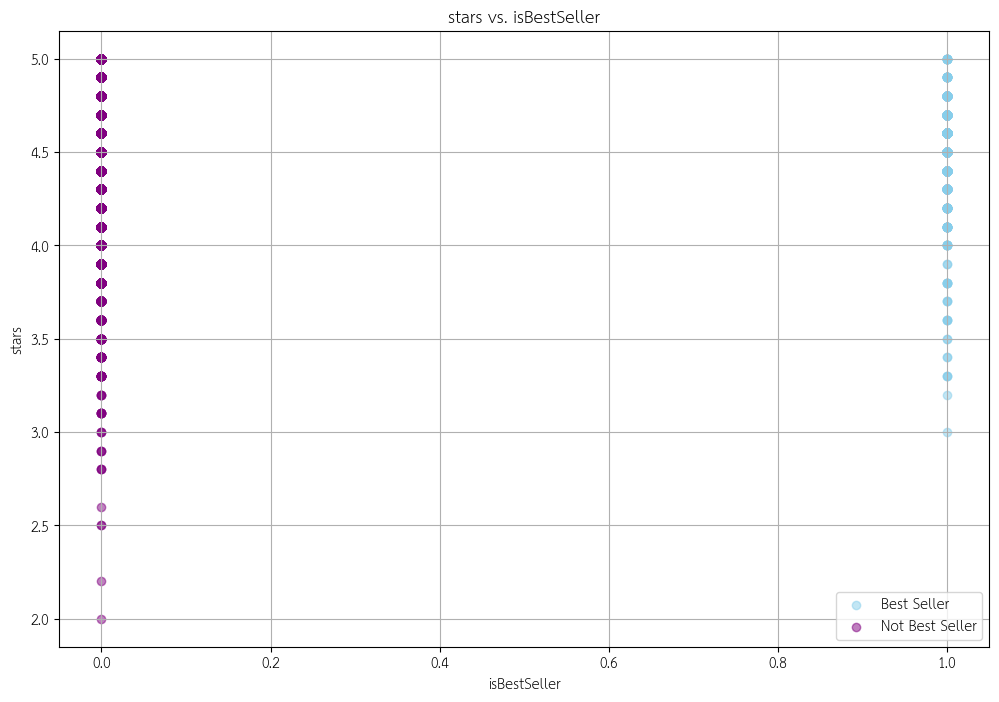

For star rating 1.00-1.99, Best Seller=0, Not Best Seller=0
For star rating 2.00-2.99, Best Seller=0, Not Best Seller=11
For star rating 3.00-3.99, Best Seller=24, Not Best Seller=873
For star rating 4.00-4.99, Best Seller=624, Not Best Seller=32591
For star rating 5.00-5.99, Best Seller=10, Not Best Seller=338


In [ ]:
plt.figure(figsize=(12, 8))  # Increase the figure size for better visualization

# Scatter plot for True values of isBestSeller
plt.scatter(df[df['isBestSeller'] == True]['isBestSeller'], df[df['isBestSeller'] == True]['stars'], color='skyblue', label='Best Seller', alpha=0.5)

# Scatter plot for False values of isBestSeller
plt.scatter(df[df['isBestSeller'] == False]['isBestSeller'], df[df['isBestSeller'] == False]['stars'], color='purple', label='Not Best Seller', alpha=0.5)

plt.title('stars vs. isBestSeller')
plt.xlabel('isBestSeller')
plt.ylabel('stars')
plt.legend()
plt.grid(True)
plt.show()

for star_rating in range(1, 6):
    lower_bound = star_rating
    upper_bound = star_rating + 0.99
    best_seller_count = df[(df['stars'] >= lower_bound) & (df['stars'] <= upper_bound) & (df['isBestSeller'] == True)].shape[0]
    not_best_seller_count = df[(df['stars'] >= lower_bound) & (df['stars'] <= upper_bound) & (df['isBestSeller'] == False)].shape[0]
    print(f"For star rating {lower_bound:.2f}-{upper_bound:.2f}, Best Seller={best_seller_count}, Not Best Seller={not_best_seller_count}")


### isGoodReadsChoice Vs. Category_name (9)

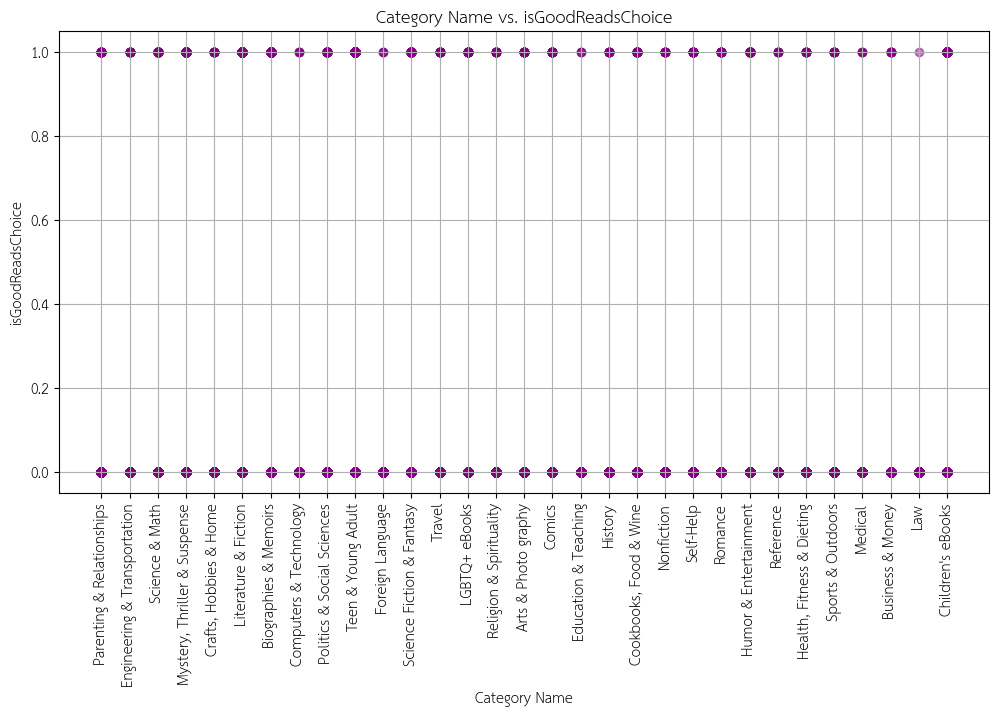

                              Not GoodReads Choice  GoodReads Choice
category_name                                                       
Arts & Photo graphy                           4898                18
Biographies & Memoirs                         5261               144
Business & Money                              2569                 8
Children's eBooks                             5595               152
Comics                                         458                20
Computers & Technology                        5500                 4
Cookbooks, Food & Wine                        5292                41
Crafts, Hobbies & Home                        5490                12
Education & Teaching                          4983                 3
Engineering & Transportation                  6147                15
Foreign Language                              5721                 3
Health, Fitness & Dieting                     1573                12
History                           

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figsize to (12, 6) for a standard size
plt.scatter(df['category_name'], df['isGoodReadsChoice'], color='purple',alpha=0.5)
plt.title('Category Name vs. isGoodReadsChoice')
plt.xlabel('Category Name')
plt.ylabel('isGoodReadsChoice')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Group by category_name and isGoodReadsChoice to get the counts
category_counts = df.groupby(['category_name', 'isGoodReadsChoice']).size().unstack(fill_value=0)
category_counts.columns = ['Not GoodReads Choice', 'GoodReads Choice']

# Display the counts
pd.set_option('display.max_rows', None)  # Set the maximum number of rows to display
pd.set_option('display.max_columns', None)  # Set the maximum number of columns to display
print(category_counts.to_string())

# Calculate and display the percentages
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_percentages.columns = ['Not GoodReads Choice (%)', 'GoodReads Choice (%)']
print(category_percentages.to_string())



# 4.Data Analysis

### 4.1 Correlation stars and reviews ,stars and price
show graph( between stars and reviews ,stars and price find) and Correlation
(between stars and reviews ,stars and price)

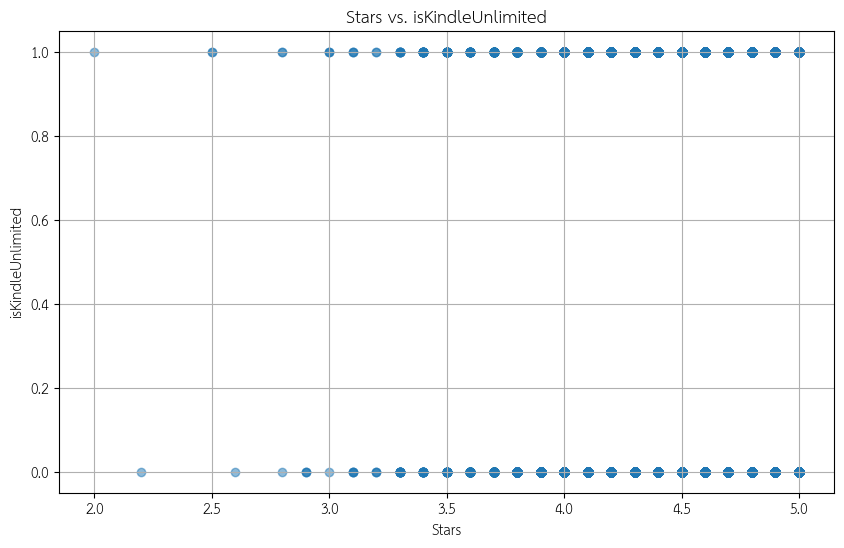

Correlation between 'stars' and 'isKindleUnlimited': -0.104423563985659
Range of stars 0-1:
Number of KindleUnlimited is 0 and NotKindleUnlimited is 0
Range of stars 1-2:
Number of KindleUnlimited is 0 and NotKindleUnlimited is 0
Range of stars 2-3:
Number of KindleUnlimited is 5 and NotKindleUnlimited is 6
Range of stars 3-4:
Number of KindleUnlimited is 276 and NotKindleUnlimited is 621
Range of stars 4-5:
Number of KindleUnlimited is 4946 and NotKindleUnlimited is 28237


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# If your dataset is in a CSV file, you can read it using pd.read_csv('filename.csv')
# For example: df = pd.read_csv('your_dataset.csv')

# Assuming 'stars' and 'isKindleUnlimited' are the column names
# Replace 'stars' and 'isKindleUnlimited' with your actual column names if they are different

# Filtering the DataFrame
filtered_df = df[df['reviews'] <= 100000]

# Plotting graph between 'stars' and 'isKindleUnlimited'
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['stars'], filtered_df['isKindleUnlimited'], alpha=0.5)
plt.title('Stars vs. isKindleUnlimited')
plt.xlabel('Stars')
plt.ylabel('isKindleUnlimited')
plt.grid(True)
plt.show()

# Calculating correlation between 'stars' and 'isKindleUnlimited'
correlation = filtered_df['stars'].corr(filtered_df['isKindleUnlimited'])
print("Correlation between 'stars' and 'isKindleUnlimited':", correlation)

# Counting KindleUnlimited and NotKindleUnlimited in each range of stars
star_ranges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
for star_range in star_ranges:
    star_min, star_max = star_range
    count_kindle_unlimited = filtered_df[(filtered_df['stars'] >= star_min) & (filtered_df['stars'] < star_max) & (filtered_df['isKindleUnlimited'] == True)].shape[0]
    count_not_kindle_unlimited = filtered_df[(filtered_df['stars'] >= star_min) & (filtered_df['stars'] < star_max) & (filtered_df['isKindleUnlimited'] == False)].shape[0]
    print(f"Range of stars {star_min}-{star_max}:")
    print(f"Number of KindleUnlimited is {count_kindle_unlimited} and NotKindleUnlimited is {count_not_kindle_unlimited}")


###4.2 Correlation between Price, Stars, and Reviews

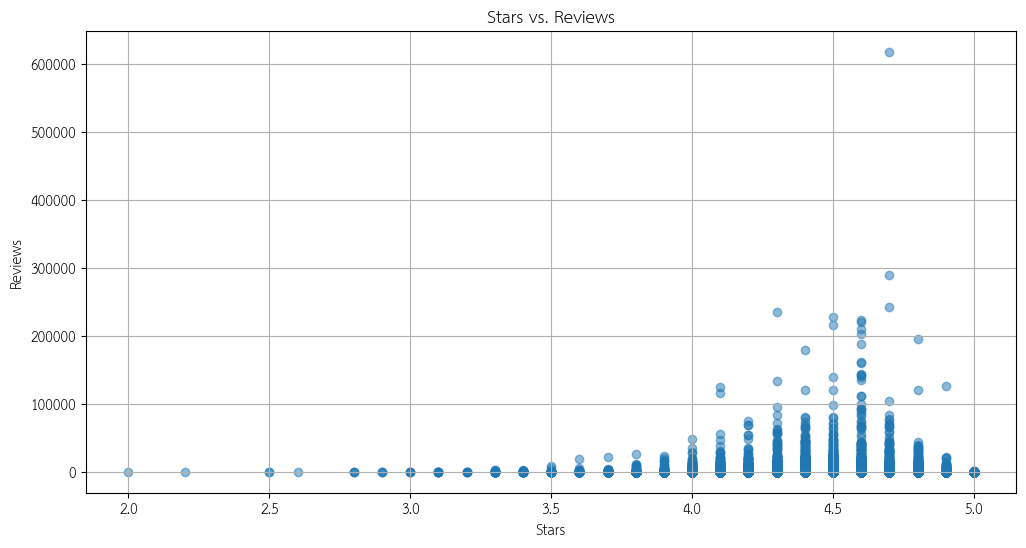

Correlation between 'stars' and 'reviews': 0.004915743332540476


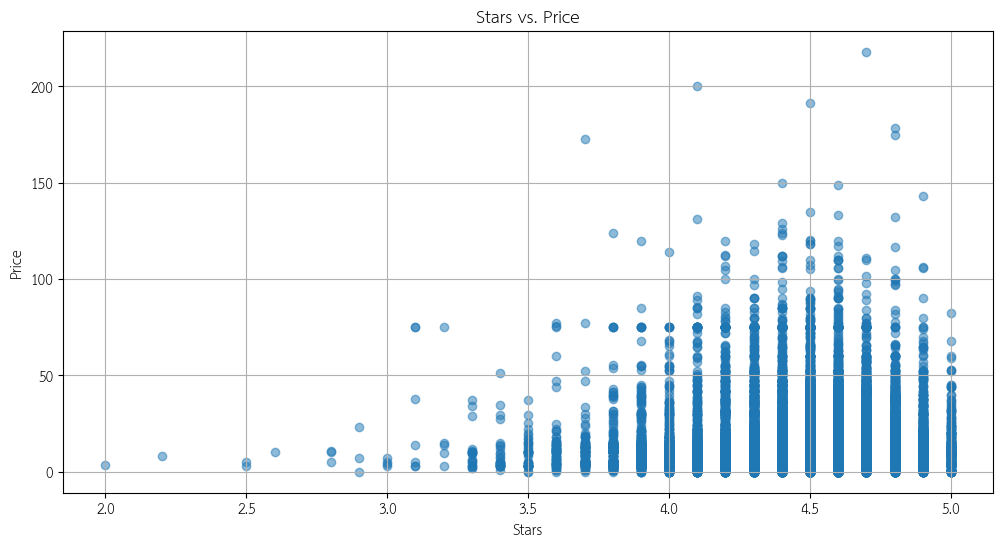

Correlation between 'stars' and 'price': 0.024710416889683454


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# If your dataset is in a CSV file, you can read it using pd.read_csv('filename.csv')
# For example: df = pd.read_csv('your_dataset.csv')

# Plotting graph between 'stars' and 'reviews'
plt.figure(figsize=(12, 6))
plt.scatter(df['stars'], df['reviews'], alpha=0.5)
plt.title('Stars vs. Reviews')
plt.xlabel('Stars')
plt.ylabel('Reviews')
plt.grid(True)
plt.show()

# Calculating correlation between 'stars' and 'reviews'
correlation_reviews = df['stars'].corr(df['reviews'])
print("Correlation between 'stars' and 'reviews':", correlation_reviews)

# Plotting graph between 'stars' and 'price'
plt.figure(figsize=(12, 6))
plt.scatter(df['stars'], df['price'], alpha=0.5)
plt.title('Stars vs. Price')
plt.xlabel('Stars')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Calculating correlation between 'stars' and 'price'
correlation_price = df['stars'].corr(df['price'])
print("Correlation between 'stars' and 'price':", correlation_price)


In [ ]:
# Calculate correlation matrix
correlation_matrix = df[['price', 'stars', 'reviews']].corr()

# Print correlation matrix
print("Correlation between Price, Stars, and Reviews:")
print(correlation_matrix)


Correlation between Price, Stars, and Reviews:
            price     stars   reviews
price    1.000000  0.024710 -0.056033
stars    0.024710  1.000000  0.004916
reviews -0.056033  0.004916  1.000000


#5. ANOVA & Regression

### 5.1 One-Way ANOVA

####Code 5.1

In [ ]:
from scipy.stats import f_oneway

# 1. Category_name vs. stars
category_groups = [group["stars"] for name, group in df.groupby("category_name")]
f_statistic, p_value = f_oneway(*category_groups)
print("1. Category_name vs. stars:")
print("   F-statistic:", f_statistic)
print("   p-value:", p_value)
print()

# 2. IsKindleUnlimited vs. stars
kindle_unlimited_stars = df[df["isKindleUnlimited"]]["stars"]
non_kindle_unlimited_stars = df[~df["isKindleUnlimited"]]["stars"]
f_statistic, p_value = f_oneway(kindle_unlimited_stars, non_kindle_unlimited_stars)
print("2. IsKindleUnlimited vs. stars:")
print("   F-statistic:", f_statistic)
print("   p-value:", p_value)
print()

# 3. Price vs. isGoodReadsChoice
is_goodreads_choice_price = df[df["isGoodReadsChoice"]]["price"]
not_goodreads_choice_price = df[~df["isGoodReadsChoice"]]["price"]
f_statistic, p_value = f_oneway(is_goodreads_choice_price, not_goodreads_choice_price)
print("3. Price vs. isGoodReadsChoice:")
print("   F-statistic:", f_statistic)
print("   p-value:", p_value)
print()

# 4. Reviews vs. isGoodReadsChoice
is_goodreads_choice_reviews = df[df["isGoodReadsChoice"]]["reviews"]
not_goodreads_choice_reviews = df[~df["isGoodReadsChoice"]]["reviews"]
f_statistic, p_value = f_oneway(is_goodreads_choice_reviews, not_goodreads_choice_reviews)
print("4. Reviews vs. isGoodReadsChoice:")
print("   F-statistic:", f_statistic)
print("   p-value:", p_value)
print()

# 5. Stars vs. isGoodReadsChoice
is_goodreads_choice_stars = df[df["isGoodReadsChoice"]]["stars"]
not_goodreads_choice_stars = df[~df["isGoodReadsChoice"]]["stars"]
f_statistic, p_value = f_oneway(is_goodreads_choice_stars, not_goodreads_choice_stars)
print("5. Stars vs. isGoodReadsChoice:")
print("   F-statistic:", f_statistic)
print("   p-value:", p_value)
print()

# 6. IsBestSeller vs. stars
bestseller_stars = df[df["isBestSeller"]]["stars"]
non_bestseller_stars = df[~df["isBestSeller"]]["stars"]
f_statistic, p_value = f_oneway(bestseller_stars, non_bestseller_stars)
print("6. IsBestSeller vs. stars:")
print("   F-statistic:", f_statistic)
print("   p-value:", p_value)
print()


1. Category_name vs. stars:
   F-statistic: 205.00203812488402
   p-value: 0.0

2. IsKindleUnlimited vs. stars:
   F-statistic: 378.6303631283838
   p-value: 6.979348688411986e-84

3. Price vs. isGoodReadsChoice:
   F-statistic: 25.972478386790335
   p-value: 3.481462466321767e-07

4. Reviews vs. isGoodReadsChoice:
   F-statistic: 875.8155735557539
   p-value: 4.2728734896522547e-190

5. Stars vs. isGoodReadsChoice:
   F-statistic: 9.215052140549068
   p-value: 0.0024021243817649056

6. IsBestSeller vs. stars:
   F-statistic: 0.26185580641666234
   p-value: 0.6088513262845484



####Detail 5.1

##### ส่วนใหม่

####1.Category_name vs. Stars:
Null Hypothesis (H0): There is no significant difference in the average star ratings across different categories.
Alternative Hypothesis (H1): There is a significant difference in the average star ratings across different categories.

####2.IsKindleUnlimited vs. Stars:
Null Hypothesis (H0): There is no significant difference in the average star ratings between books available on KindleUnlimited and those that are not.
Alternative Hypothesis (H1): There is a significant difference in the average star ratings between books available on KindleUnlimited and those that are not.

####3.Price vs. IsGoodReadsChoice:
Null Hypothesis (H0): There is no significant difference in prices between books that are Goodreads Choice winners and those that are not.
Alternative Hypothesis (H1): There is a significant difference in prices between books that are Goodreads Choice winners and those that are not.
####4.Reviews vs. IsGoodReadsChoice:
Null Hypothesis (H0): There is no significant difference in the average number of reviews between books that are Goodreads Choice winners and those that are not.
Alternative Hypothesis (H1): There is a significant difference in the average number of reviews between books that are Goodreads Choice winners and those that are not.
####5.Stars vs. IsGoodReadsChoice:
Null Hypothesis (H0): There is no significant difference in the average star ratings between books that are Goodreads Choice winners and those that are not.
Alternative Hypothesis (H1): There is a significant difference in the average star ratings between books that are Goodreads Choice winners and those that are not.
####6.IsBestSeller vs. Stars:
Null Hypothesis (H0): There is no significant difference in the average star ratings between books that are bestsellers and those that are not.
Alternative Hypothesis (H1): There is a significant difference in the average star ratings between books that are bestsellers and those that are not.


###5.2 Regression

In [ ]:
import statsmodels.formula.api as smf

# 1. Price vs. Stars
model_price_stars = smf.ols(formula='stars ~ price', data=df).fit()
print("\nPrice vs. Stars:")
print(model_price_stars.summary())

# 2. Price vs. Reviews
model_price_reviews = smf.ols(formula='reviews ~ price', data=df).fit()
print("\nPrice vs. Reviews:")
print(model_price_reviews.summary())

# 3. Stars vs. Reviews
model_stars_reviews = smf.ols(formula='reviews ~ stars', data=df).fit()
print("\nStars vs. Reviews:")
print(model_stars_reviews.summary())



Price vs. Stars:
                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     21.06
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.47e-06
Time:                        14:50:40   Log-Likelihood:                 4.2905
No. Observations:               34471   AIC:                            -4.581
Df Residuals:                   34469   BIC:                             12.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5019      0.002  

### 5.3 Chisquare Test

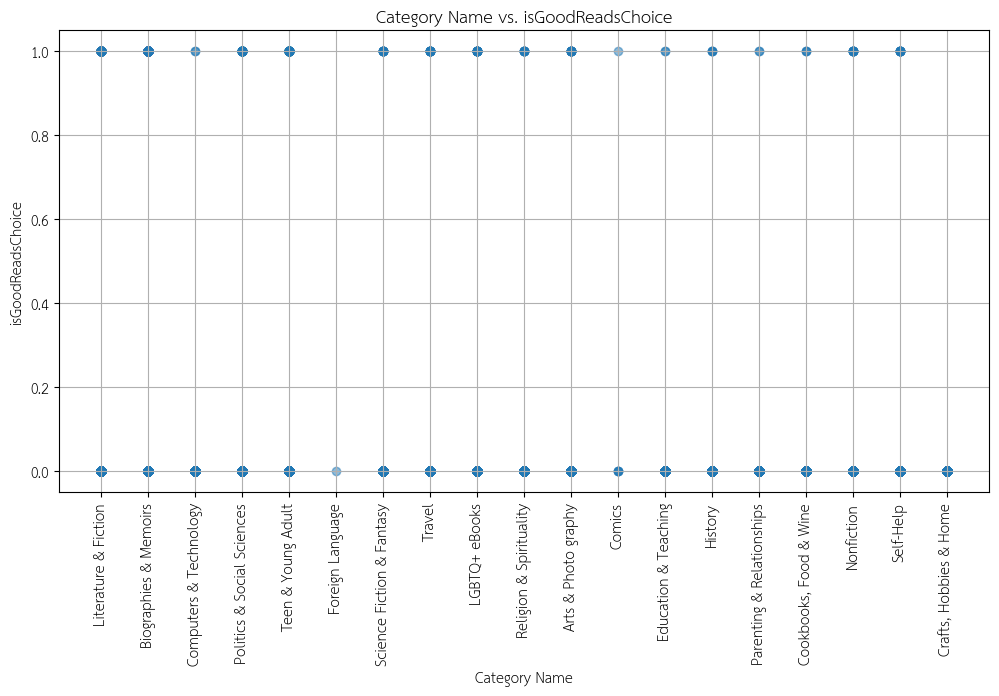

                            Not GoodReads Choice  GoodReads Choice
category_name                                                     
Arts & Photo graphy                         3294                13
Biographies & Memoirs                       4524               133
Comics                                         4                 1
Computers & Technology                      3422                 2
Cookbooks, Food & Wine                       841                 3
Crafts, Hobbies & Home                       299                 0
Education & Teaching                        3199                 2
Foreign Language                               1                 0
History                                     1328                 4
LGBTQ+ eBooks                               1251                17
Literature & Fiction                        1287               102
Nonfiction                                   665                10
Parenting & Relationships                    504              

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figsize to (12, 6) for a standard size
plt.scatter(df['category_name'], df['isGoodReadsChoice'], alpha=0.5)
plt.title('Category Name vs. isGoodReadsChoice')
plt.xlabel('Category Name')
plt.ylabel('isGoodReadsChoice')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Group by category_name and isGoodReadsChoice to get the counts
category_counts = df.groupby(['category_name', 'isGoodReadsChoice']).size().unstack(fill_value=0)
category_counts.columns = ['Not GoodReads Choice', 'GoodReads Choice']

# Display the counts
pd.set_option('display.max_rows', None)  # Set the maximum number of rows to display
pd.set_option('display.max_columns', None)  # Set the maximum number of columns to display
print(category_counts.to_string())

# Calculate and display the percentages
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
category_percentages.columns = ['Not GoodReads Choice (%)', 'GoodReads Choice (%)']
print(category_percentages.to_string())

import scipy.stats as stats

# Observed frequencies (category_counts)
observed = category_counts.values

# Perform chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
